In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('countries-aggregated.csv')
%matplotlib inline

In [220]:
df['Country'].unique()
df['Date'] = pd.to_datetime(df.Date)

In [221]:
top_15 = ['US', 'Italy', 'China', 'Germany', 'Spain', 'Iran', 'France','United Kingdom','Switzerland',
         'Belgium', 'Netherlands', 'Turkey', 'Korea, South', 'Austria', 'Canada', 'India']
'''
top_15 = ['US','Italy','China','Russia','Afghanistan','Bhutan','Nepal','United Arab Emirates','United Kingdom']
'''

"\ntop_15 = ['US','Italy','China','Russia','Afghanistan','Bhutan','Nepal','United Arab Emirates','United Kingdom']\n"

In [222]:
df = df[(df['Confirmed'] !=0) & (df.Country.isin(top_15))].sort_values(by=['Country', 'Date'])

In [223]:
df['Country'].unique()

array(['Austria', 'Belgium', 'Canada', 'China', 'France', 'Germany',
       'India', 'Iran', 'Italy', 'Korea, South', 'Netherlands', 'Spain',
       'Switzerland', 'Turkey', 'US', 'United Kingdom'], dtype=object)

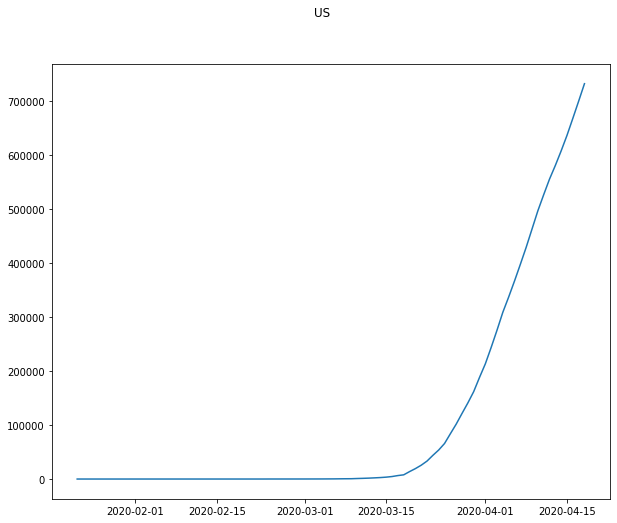

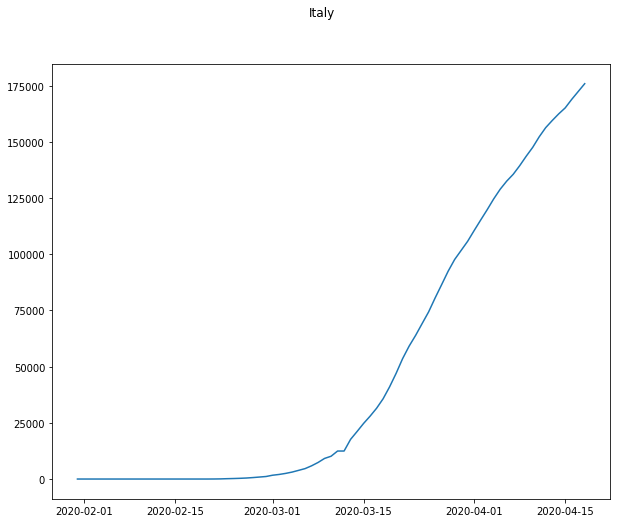

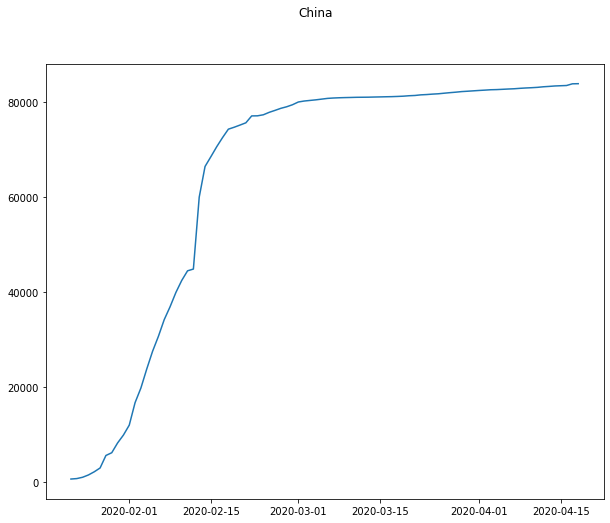

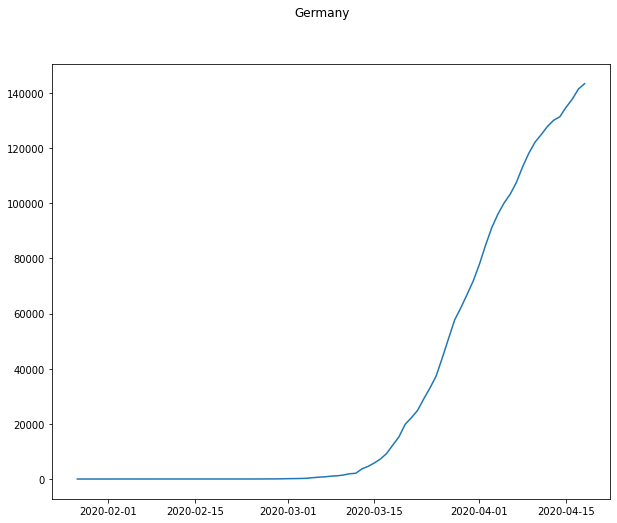

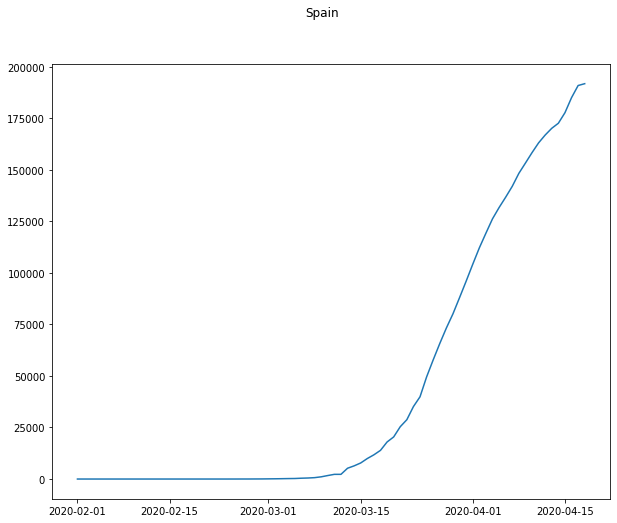

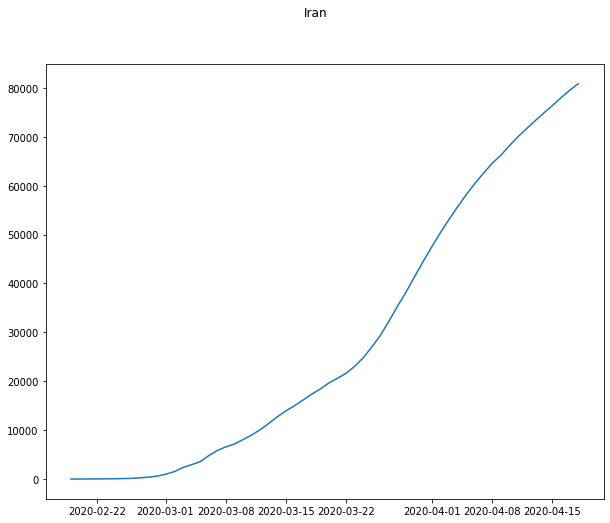

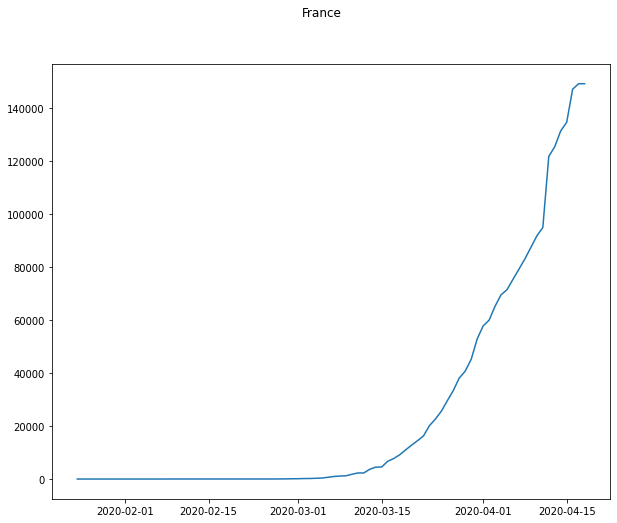

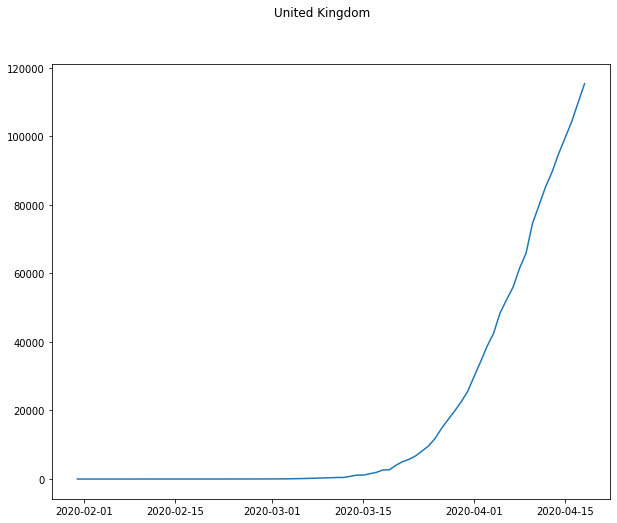

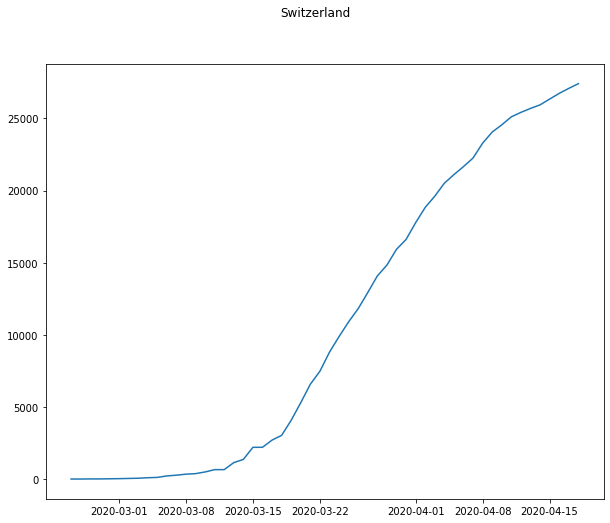

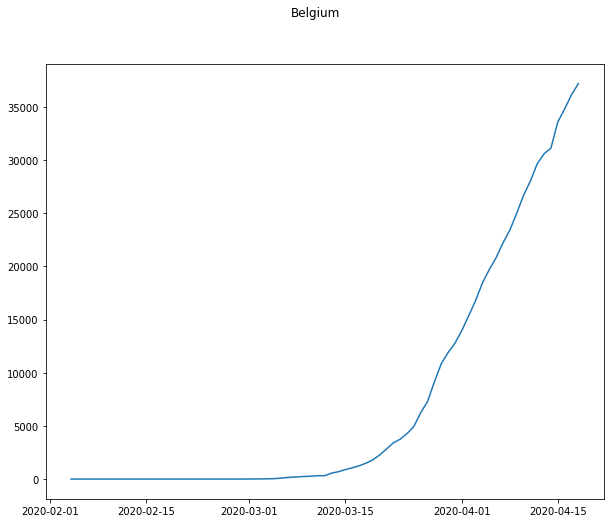

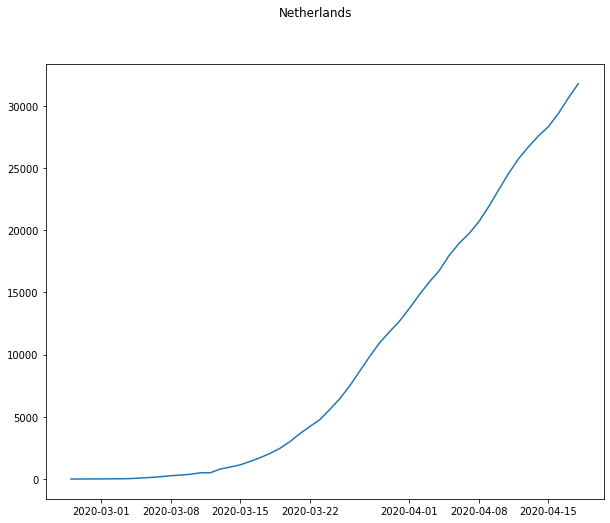

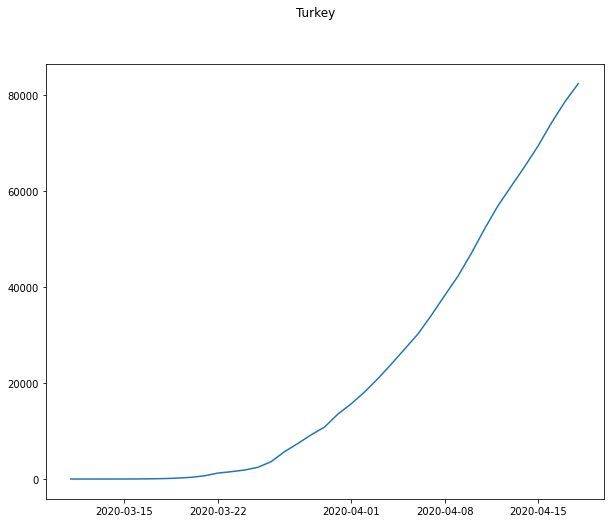

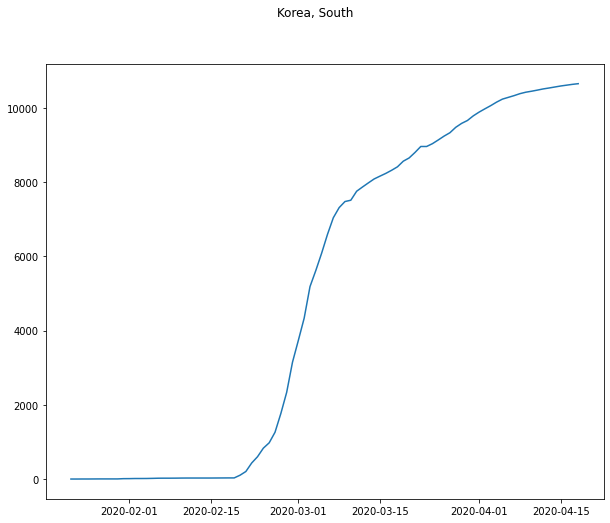

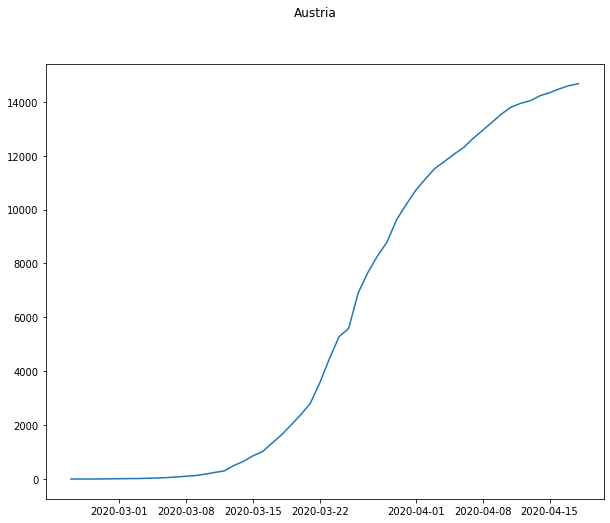

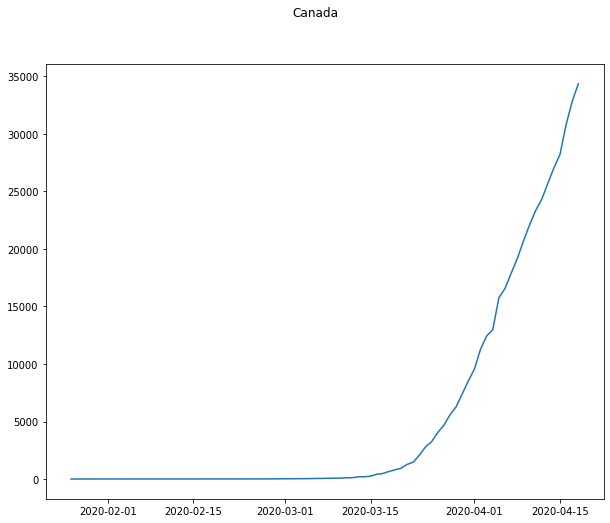

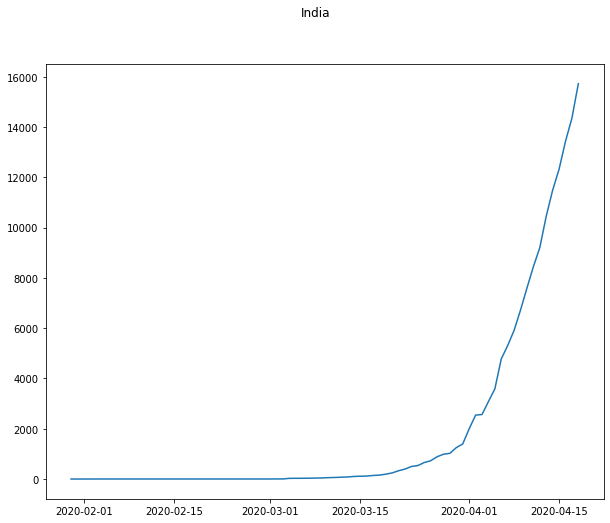

In [224]:
for country in top_15:   
    fd = df[df['Country'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(fd['Date'], fd['Confirmed'])

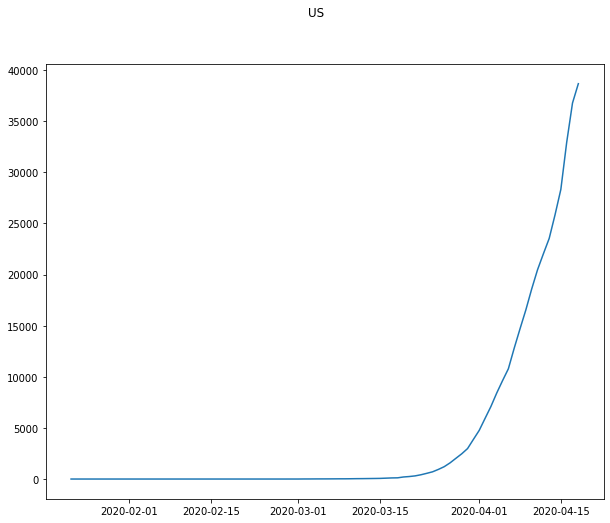

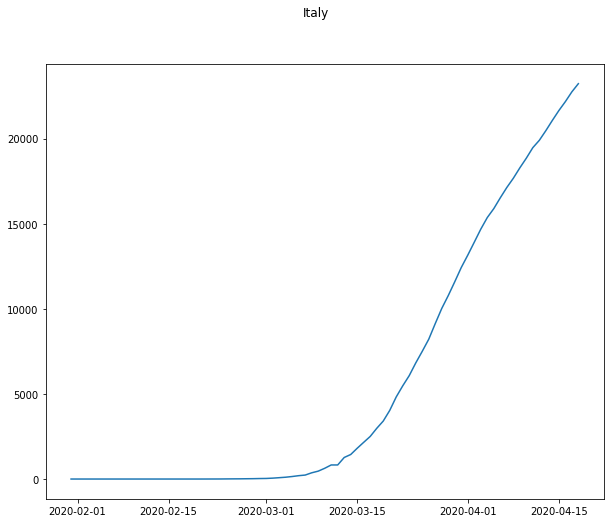

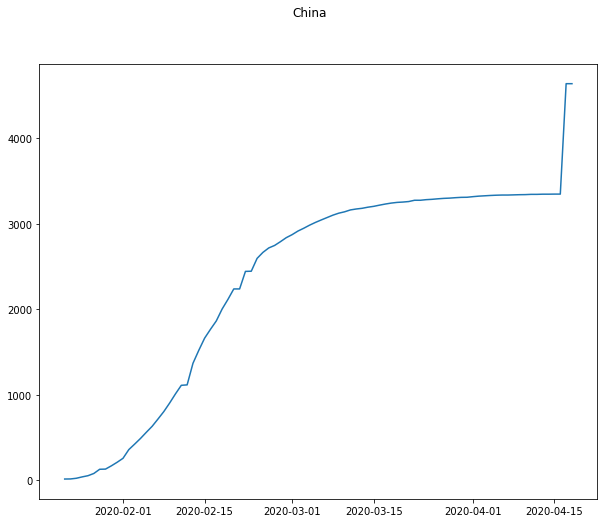

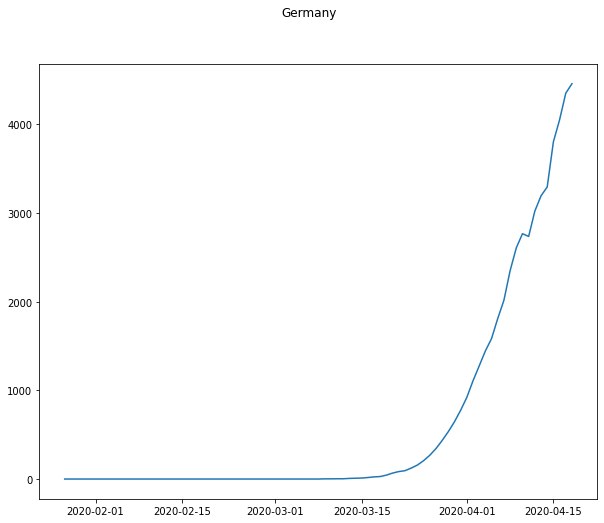

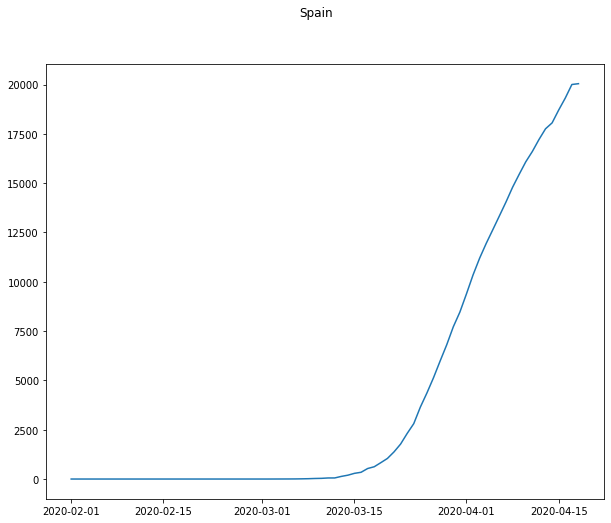

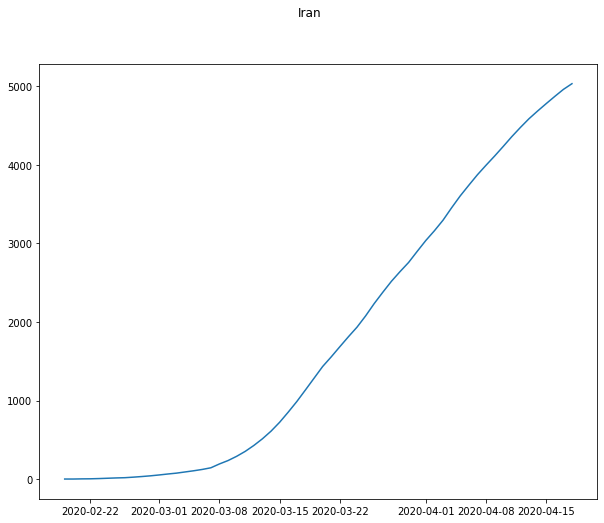

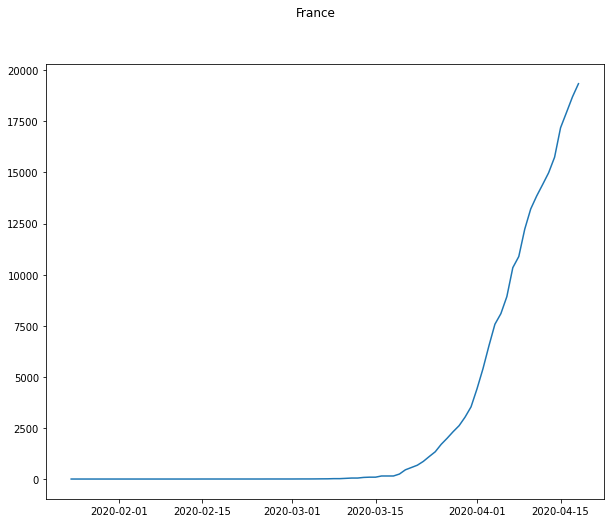

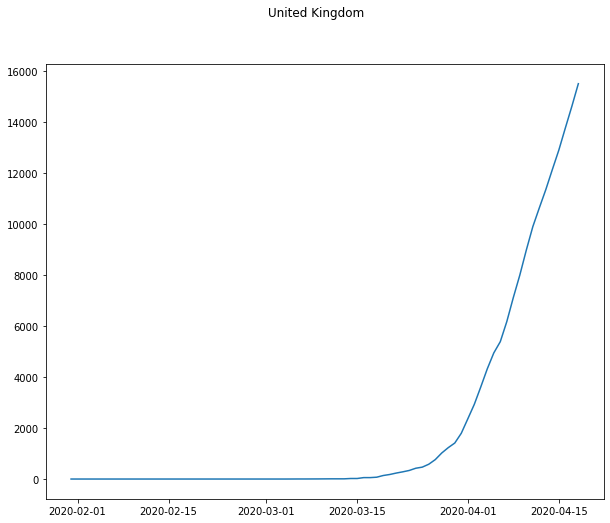

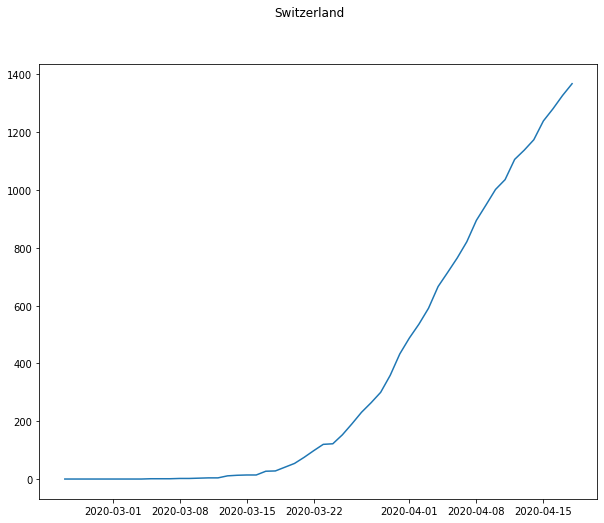

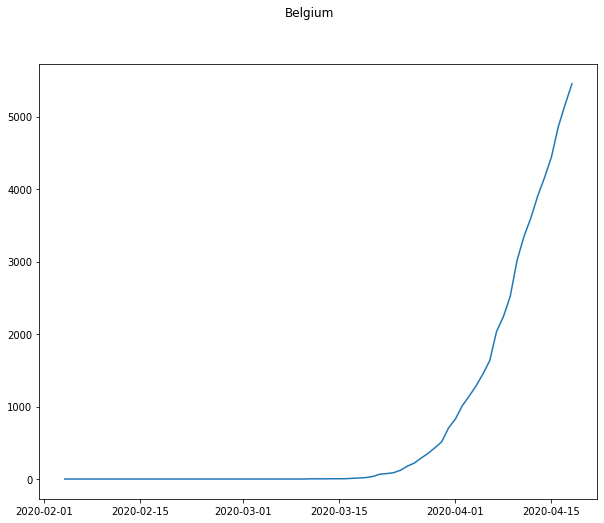

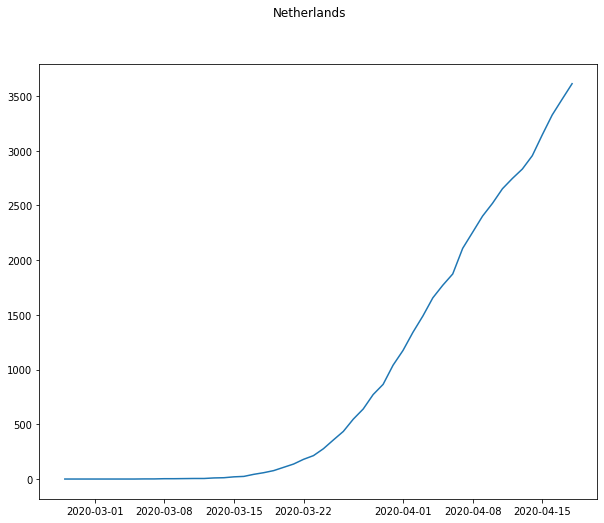

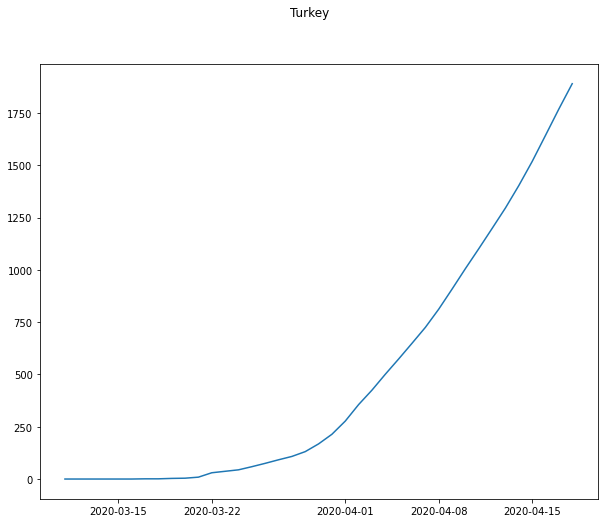

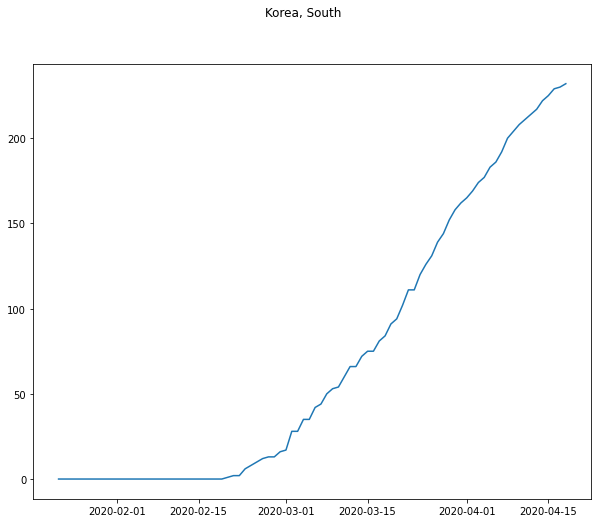

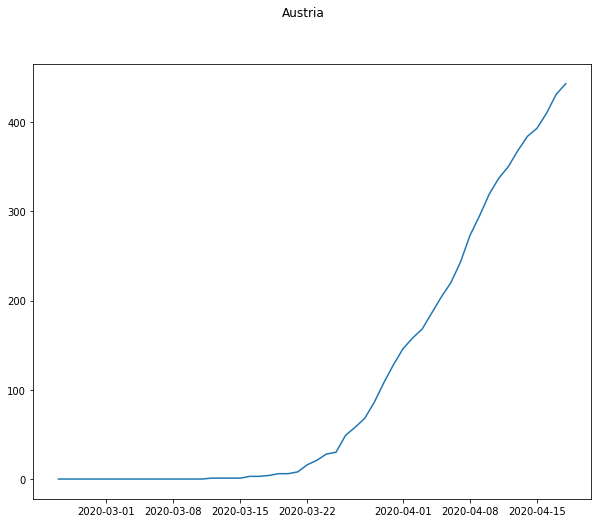

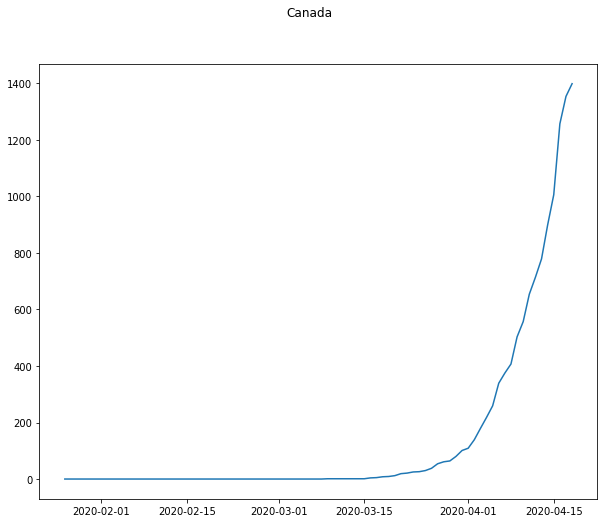

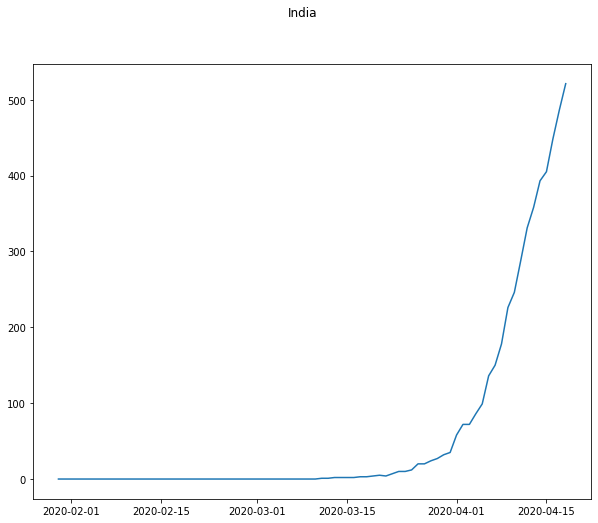

In [225]:
for country in top_15:   
    fd = df[df['Country'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(fd['Date'], fd['Deaths'])

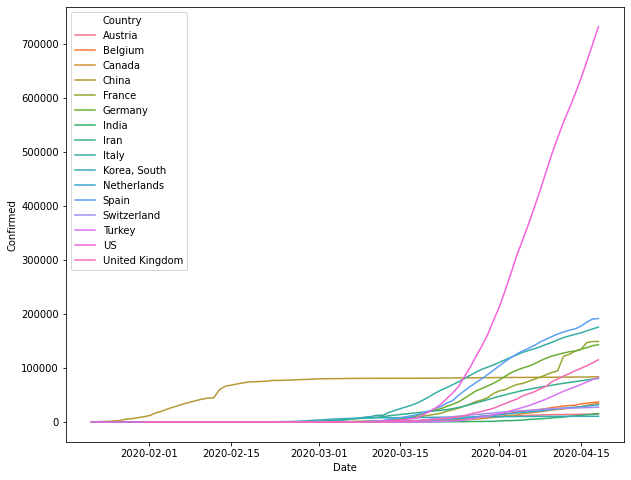

In [226]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Date', y='Confirmed', data =df, hue='Country')


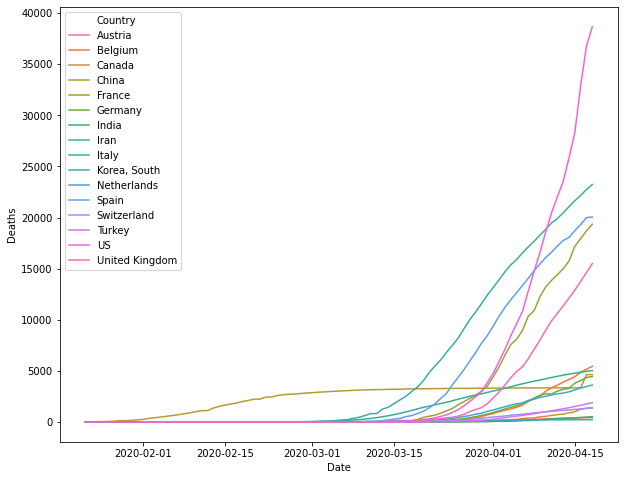

In [227]:
plt.figure(figsize = (10,8))
f = sns.lineplot(x = 'Date', y='Deaths', data = df, hue='Country')


In [228]:
fd = df
fd = df.sort_values(by = ['Country', 'Date'], ascending=[False, False])

In [229]:
for i in range(0, len(fd)-1):
    if fd['Confirmed'].iloc[i] >= fd['Confirmed'].iloc[i+1]:
        fd['Confirmed'].iloc[i] -= fd['Confirmed'].iloc[i+1]

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [230]:
for i in range(0, len(fd)-1):
    if fd['Deaths'].iloc[i] >= fd['Deaths'].iloc[i+1]:
        fd['Deaths'].iloc[i] -= fd['Deaths'].iloc[i+1]

In [231]:
fd = fd.sort_values(by = ['Country', 'Date'], ascending=[True, True])
fd['Date'] = pd.to_datetime(fd.Date) 

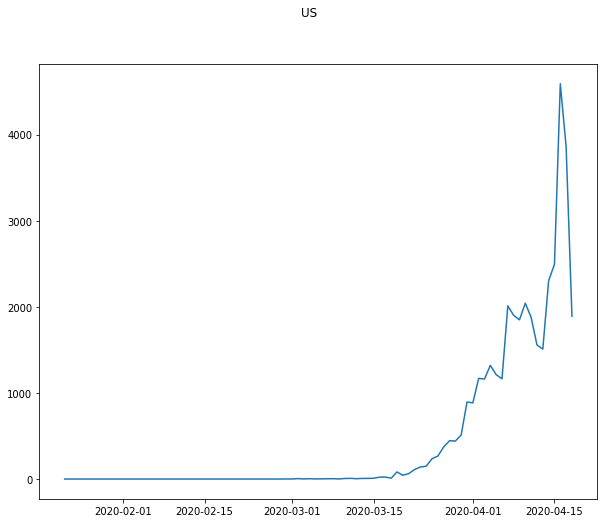

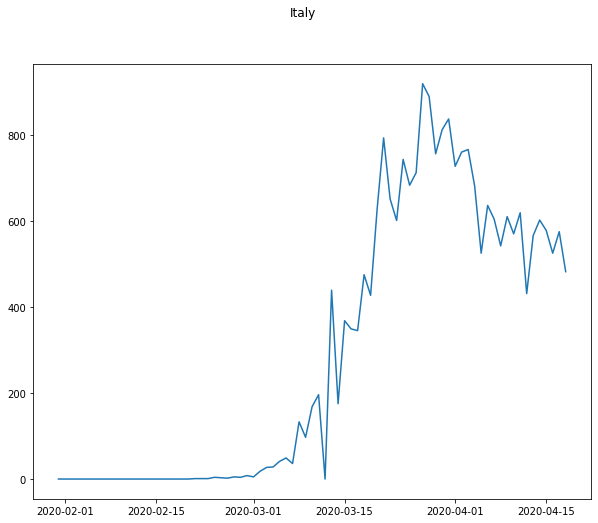

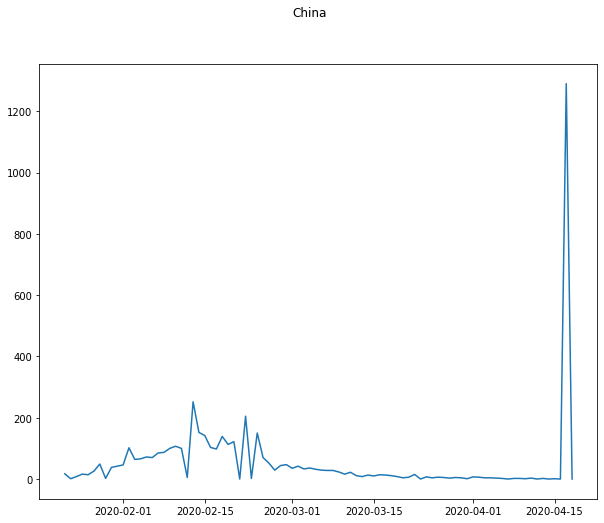

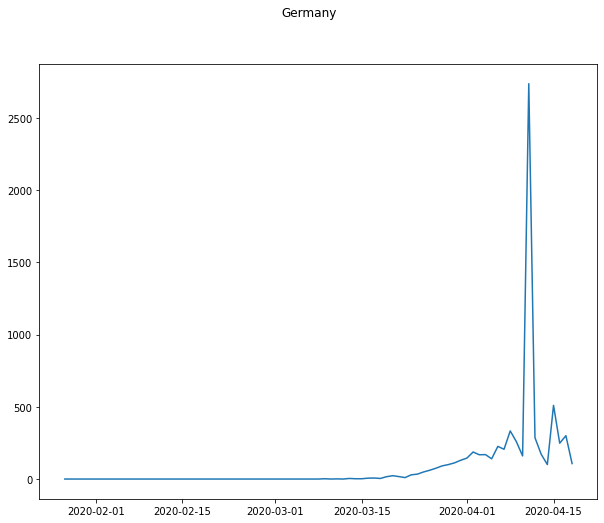

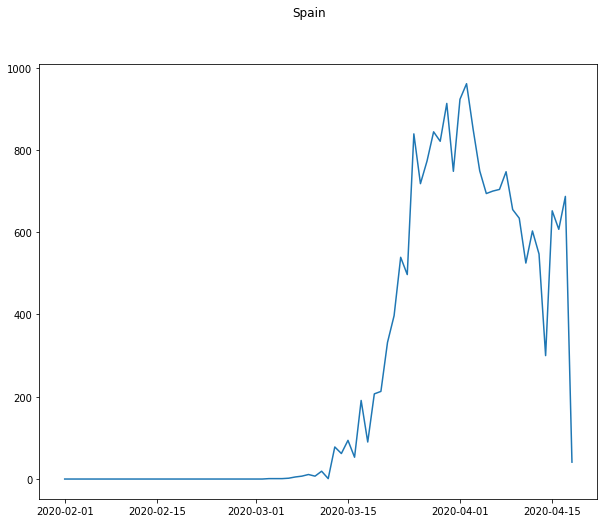

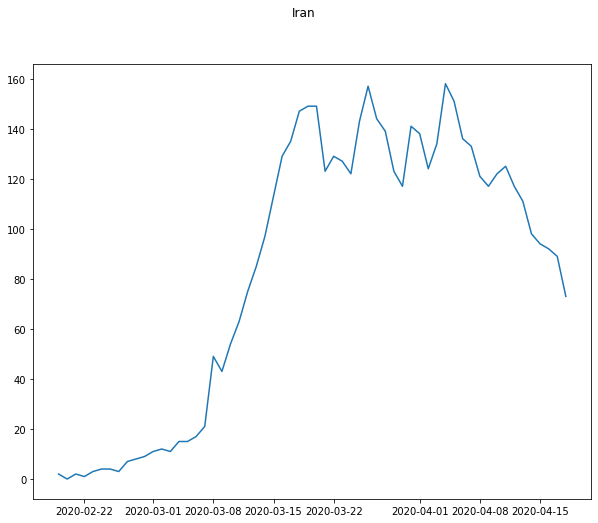

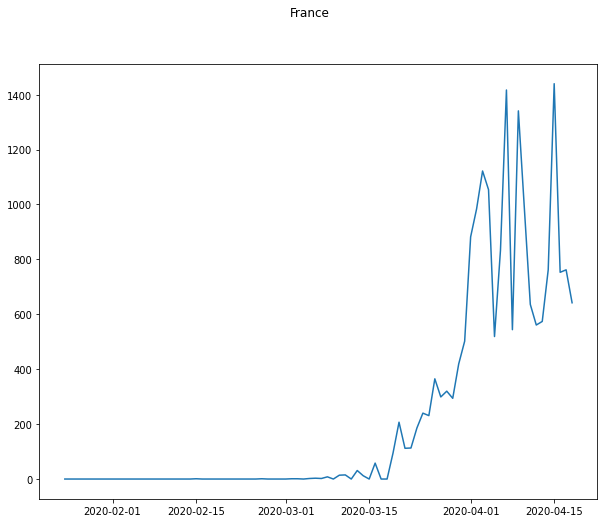

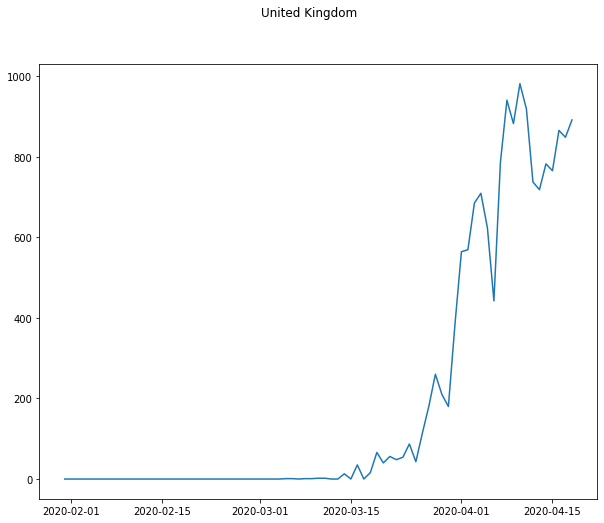

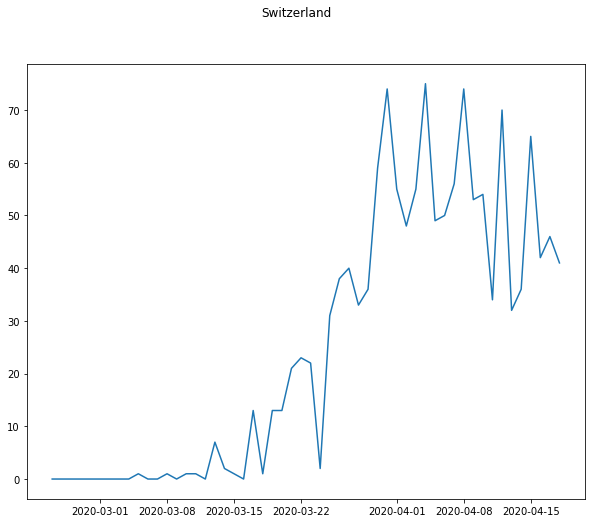

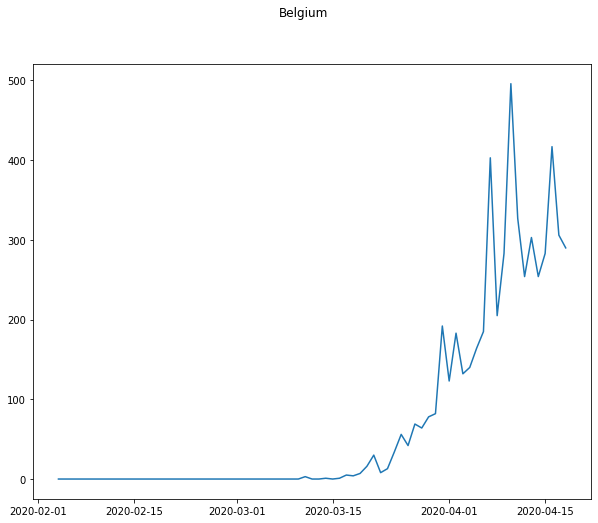

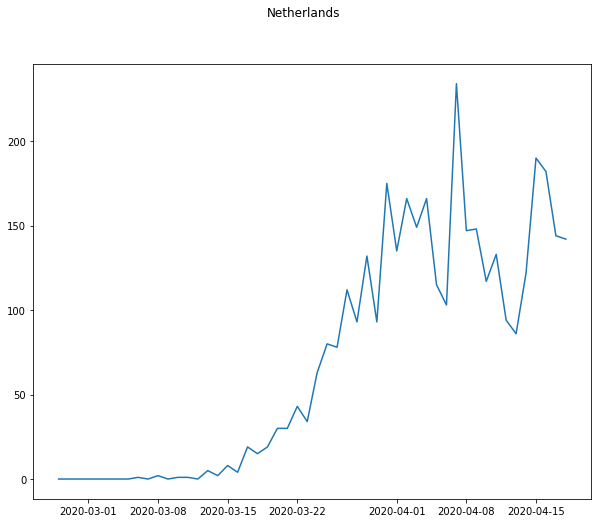

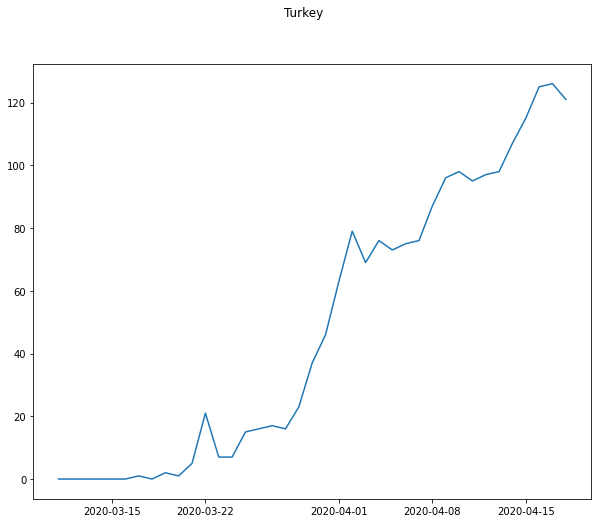

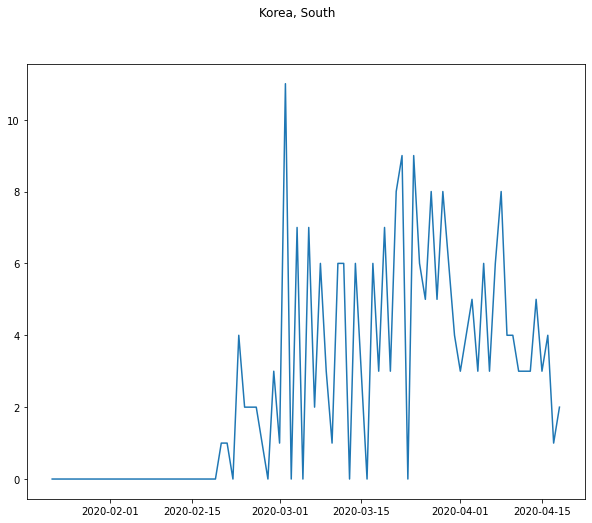

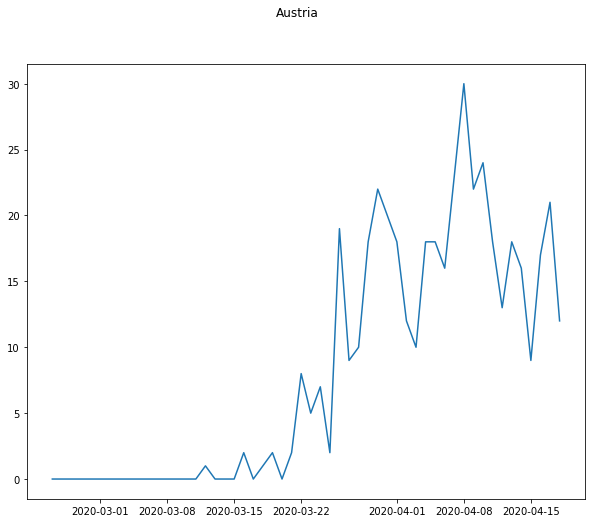

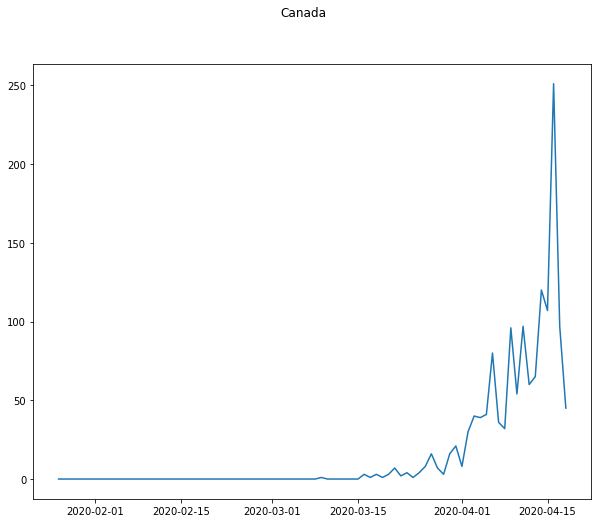

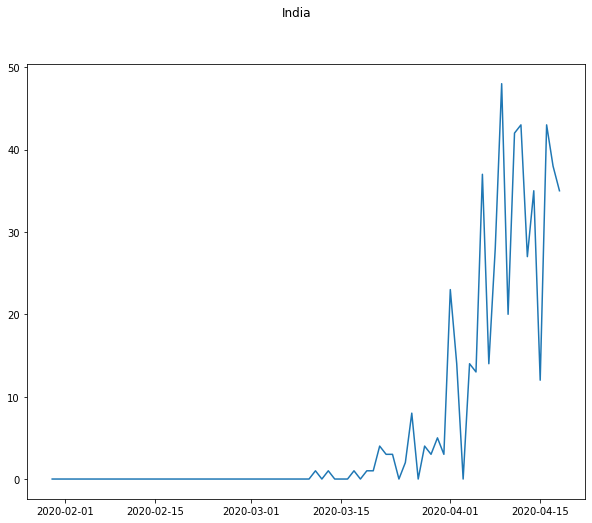

In [232]:
for country in top_15:   
    xd = fd[fd['Country'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(xd['Date'], xd['Deaths'])

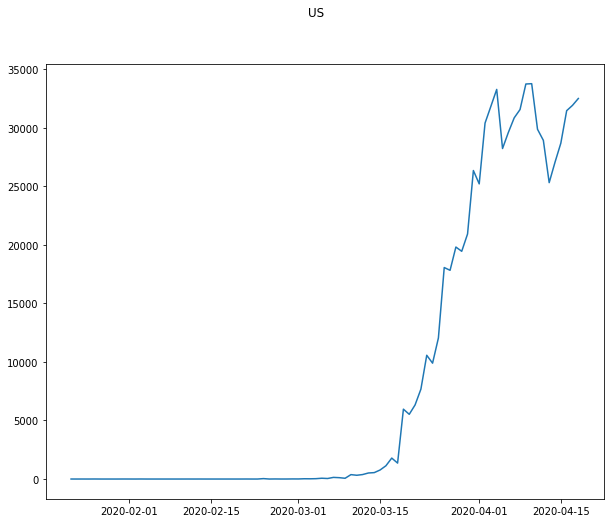

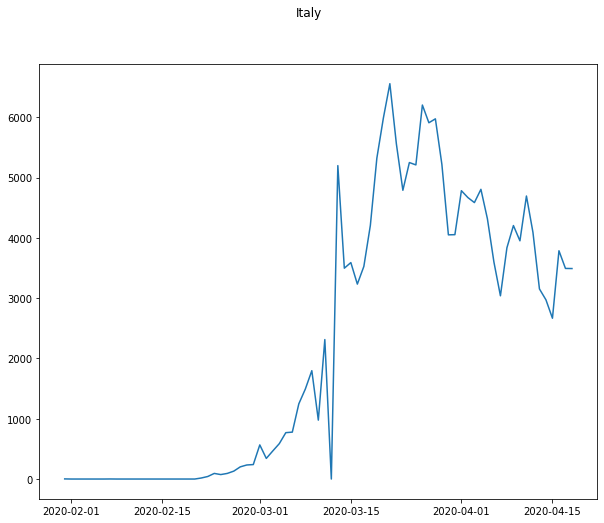

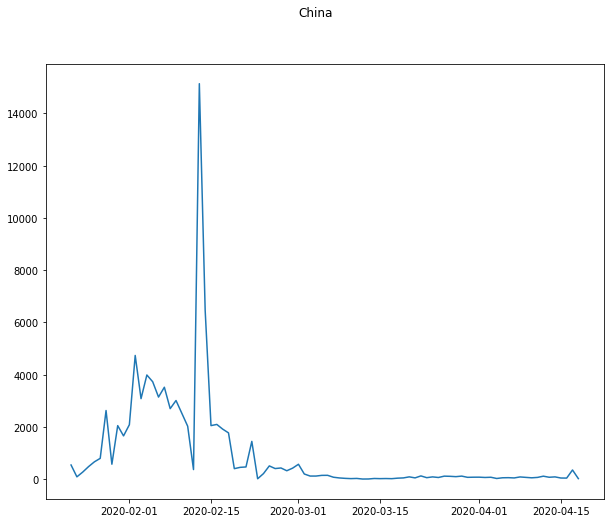

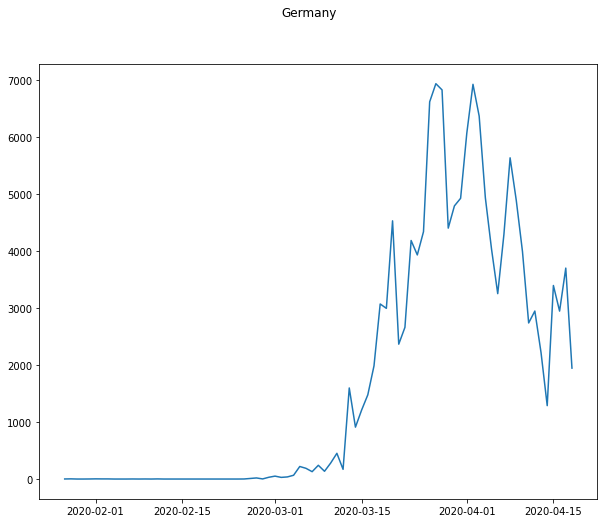

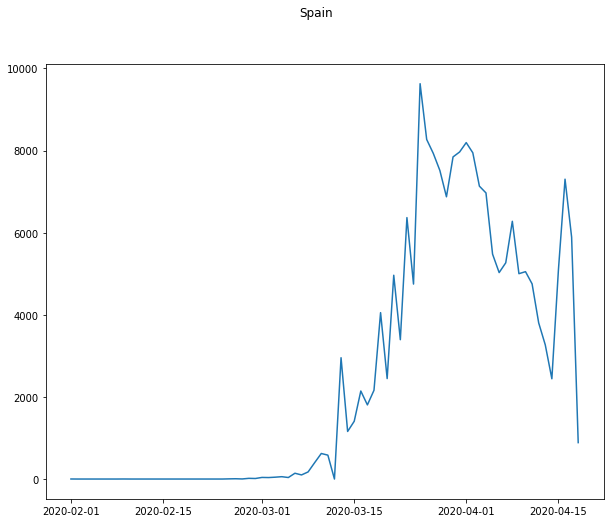

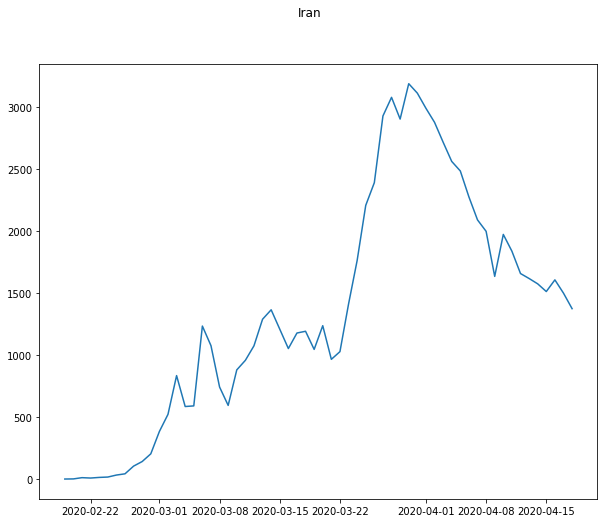

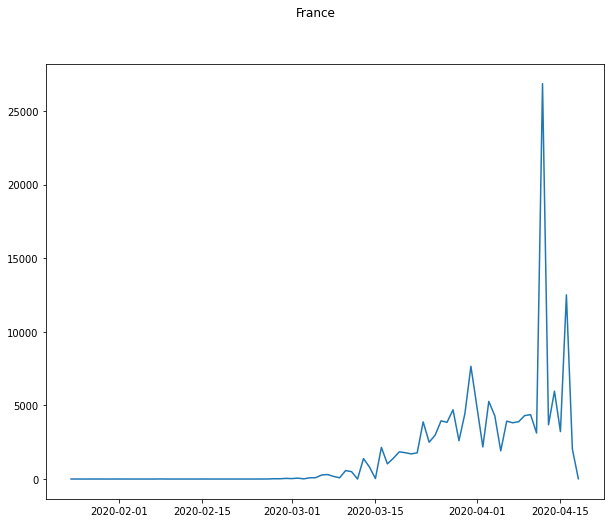

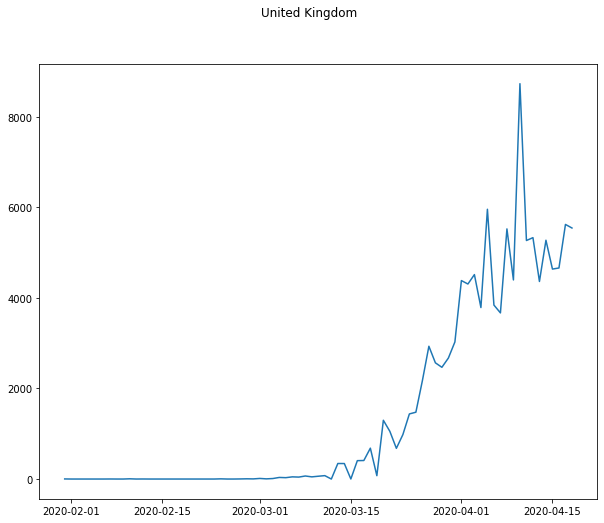

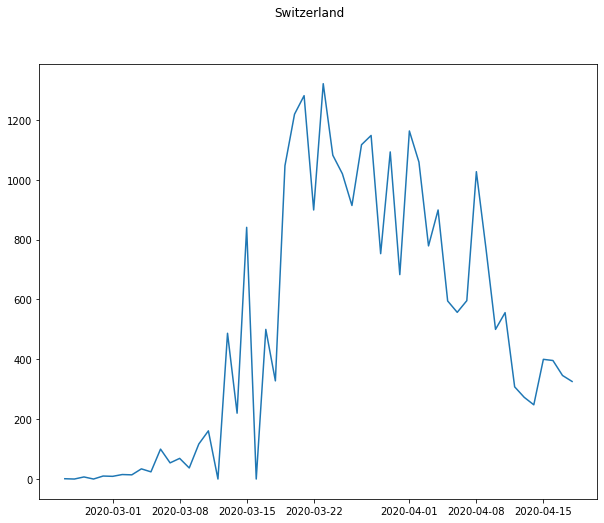

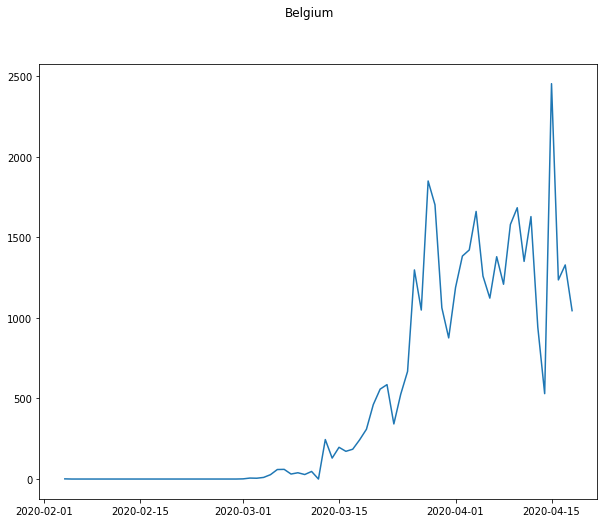

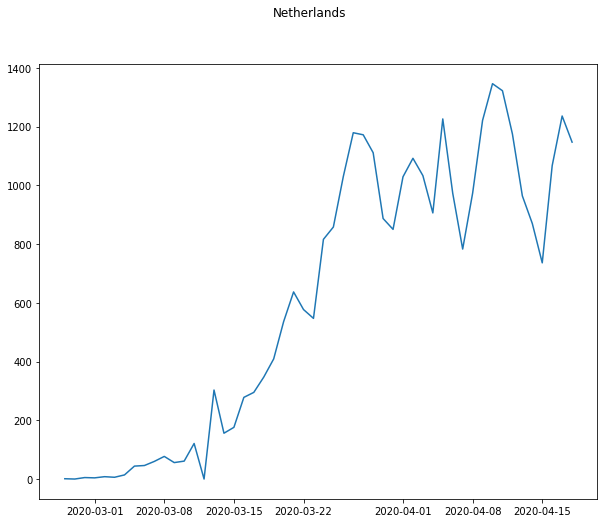

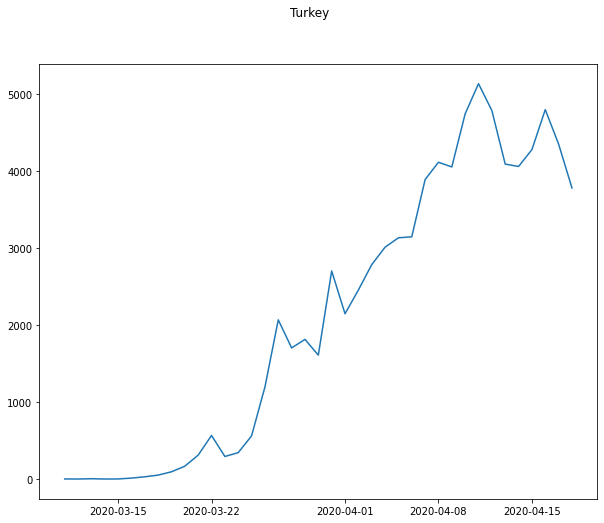

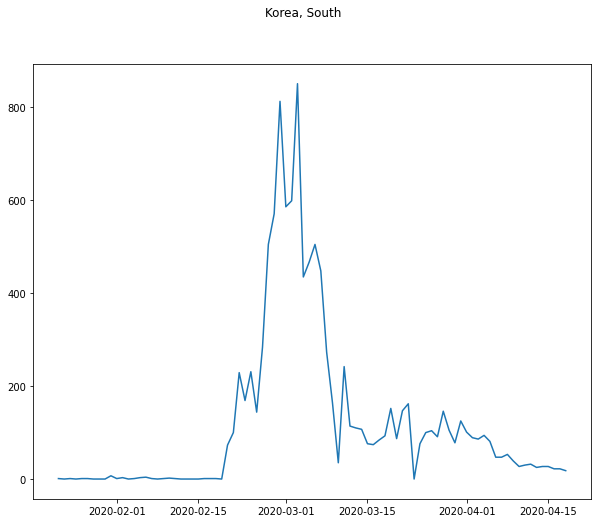

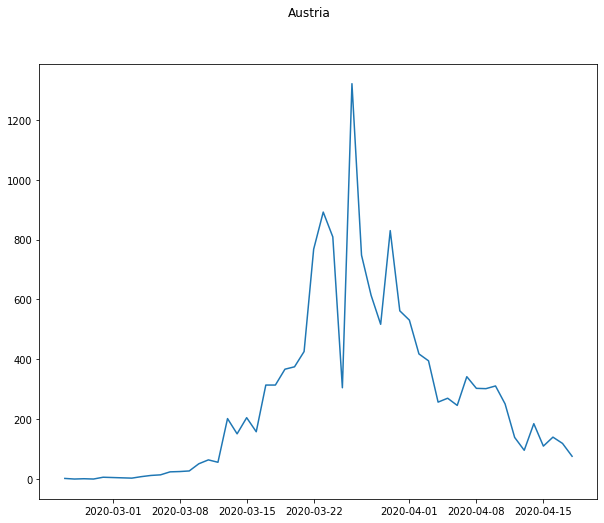

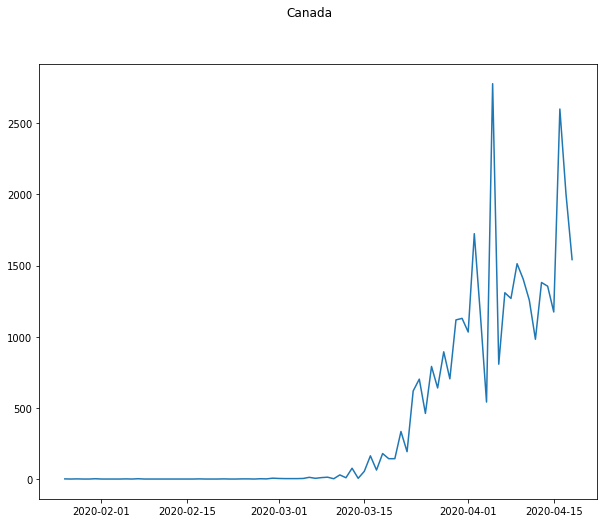

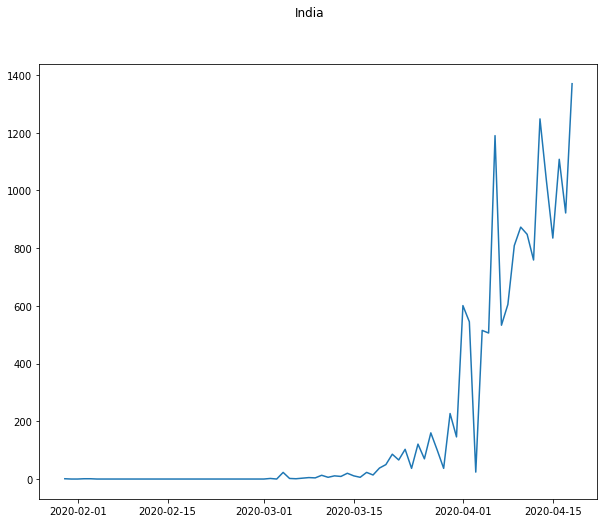

In [233]:
for country in top_15:   
    xd = fd[fd['Country'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(xd['Date'], xd['Confirmed'])

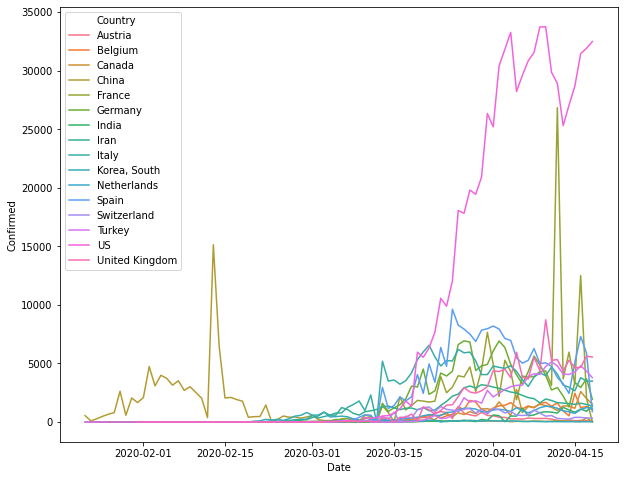

In [234]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Date', y='Confirmed', data =fd, hue='Country')

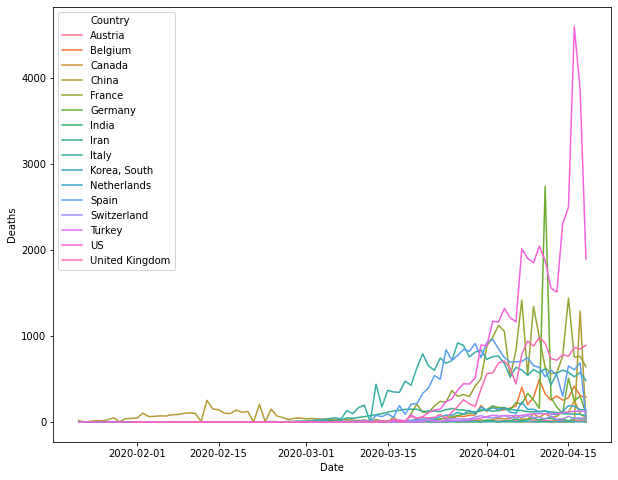

In [235]:
plt.figure(figsize = (10,8))
f = sns.lineplot(x = 'Date', y='Deaths', data = fd, hue='Country')

In [236]:
len(df['Date'].unique())

88

In [237]:
model_data = df
country_temp = []
for i in top_15:
    model_data = df
    country_temp.append(model_data[model_data['Country'] == i].reset_index())
    

In [238]:
for i in country_temp:
    i['index'] = list(i.index)

In [239]:
model_data = pd.concat(country_temp)

In [240]:
model_data.corr()

,index,Confirmed,Recovered,Deaths
index,1.000000,0.502344,0.510373,0.517648
Confirmed,0.502344,1.000000,0.569223,0.844471
Recovered,0.510373,0.569223,1.000000,0.540007
Deaths,0.517648,0.844471,0.540007,1.000000


In [241]:
Pop_density = {'US':36, 'Italy':206, 'China':153, 'Germany':240, 'Spain':94, 'Iran':52, 'France':119,'United Kingdom':281,'Switzerland':219,
         'Belgium':383, 'Netherlands':508, 'Turkey':110, 'Korea, South':527, 'Austria':109, 'Canada':4, 'India':464}

tests = {'US':11818, 'Italy':22436, 'China':13135.933333333332, 'Germany':20629, 'Spain':19896, 'Iran':4203, 'France':7103,'United Kingdom':7386,'Switzerland':25933,
         'Belgium':13969, 'Netherlands':10004, 'Turkey':7521, 'Korea, South':10982, 'Austria':20313, 'Canada':14555, 'India':291}

Pop = {'US':331002651, 'Italy':60461826, 'China':1439323776, 'Germany':83783942, 'Spain':46754778, 'Iran':83992949, 'France':65273511,'United Kingdom':67886011,'Switzerland':8654622,
      'Belgium':11589623, 'Netherlands':17134872, 'Turkey':84339067, 'Korea, South':51269185, 'Austria':9006398, 'Canada':37742154, 'India':1380004385}

beds = {'US':2.77, 'Italy':3.18, 'China':4.53, 'Germany':8, 'Spain':2.97, 'Iran':1.5, 'France':3.1,'United Kingdom':2.54,'Switzerland':4.53,
         'Belgium':5.64, 'Netherlands':3.32, 'Turkey':2.81, 'Korea, South':12.27, 'Austria':3.84, 'Canada':2.5, 'India':0.53} 


In [242]:
model_data['pop'] = model_data['Country'].map(Pop)
model_data['bed'] = model_data['Country'].map(beds)
model_data['bed_total'] = model_data['pop']/1000*model_data['bed']

In [243]:
model_data.corr()

,index,Confirmed,Recovered,Deaths,pop,bed,bed_total
index,1.000000,0.502344,0.510373,0.517648,0.087104,0.070947,0.096932
Confirmed,0.502344,1.000000,0.569223,0.844471,0.089546,-0.067660,0.171328
Recovered,0.510373,0.569223,1.000000,0.540007,0.353245,0.020520,0.555110
Deaths,0.517648,0.844471,0.540007,1.000000,-0.017759,-0.121139,0.038172
pop,0.087104,0.089546,0.353245,-0.017759,1.000000,-0.232831,0.760151
bed,0.070947,-0.067660,0.020520,-0.121139,-0.232831,1.000000,0.081647
bed_total,0.096932,0.171328,0.555110,0.038172,0.760151,0.081647,1.000000


In [244]:
model_data.drop(model_data.columns[7], axis =1, inplace=True)

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [246]:
model_data

,index,Date,Country,Confirmed,Recovered,Deaths,pop,bed_total
0,0,2020-01-22,US,1,0,0,331002651,916877.34327
1,1,2020-01-23,US,1,0,0,331002651,916877.34327
2,2,2020-01-24,US,2,0,0,331002651,916877.34327
3,3,2020-01-25,US,2,0,0,331002651,916877.34327
4,4,2020-01-26,US,5,0,0,331002651,916877.34327
...,...,...,...,...,...,...,...,...
75,75,2020-04-14,India,11487,1359,393,1380004385,731402.32405
76,76,2020-04-15,India,12322,1432,405,1380004385,731402.32405
77,77,2020-04-16,India,13430,1768,448,1380004385,731402.32405
78,78,2020-04-17,India,14352,2041,486,1380004385,731402.32405


In [247]:
#X = model_data[['index', 'Confirmed', 'Recovered', 'pop', 'bed_total']]
X = model_data[['index', 'Confirmed', 'Recovered']]
y = model_data['Deaths']
X_train, X_test, y_train, y_test_death = train_test_split(X, y, test_size=0.33, random_state=42)
lr_death = LinearRegression()
lr_death.fit(X_train, y_train)
pred_death = lr_death.predict(X_test)
pred_death[pred_death<0]=0

In [248]:
'''
fig = plt.figure(figsize = (15,12))
plt.plot(y_test_death.values)
plt.plot(pred_death)
'''


'\nfig = plt.figure(figsize = (15,12))\nplt.plot(y_test_death.values)\nplt.plot(pred_death)\n'

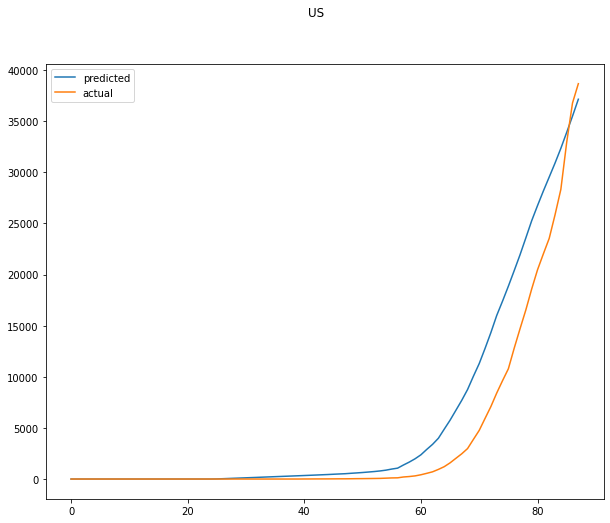

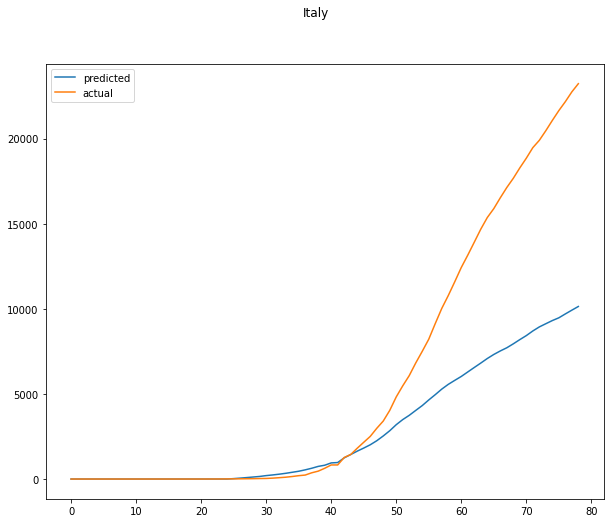

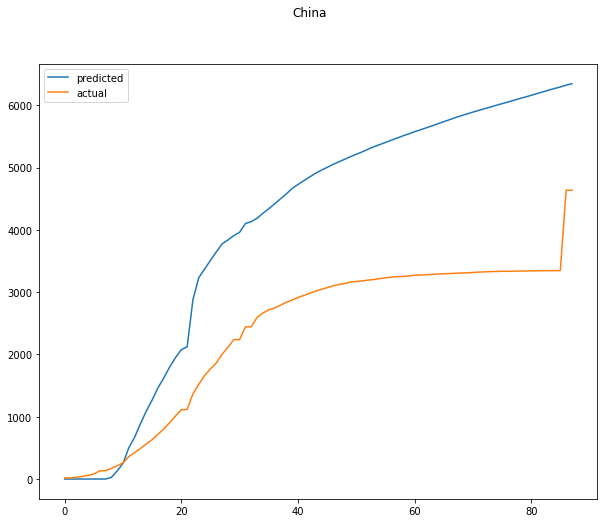

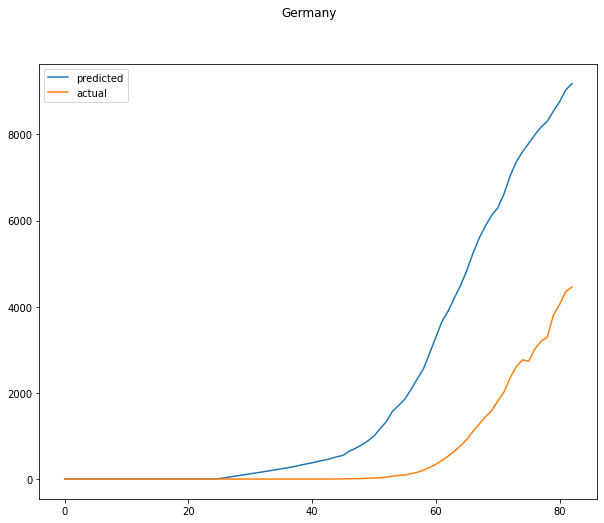

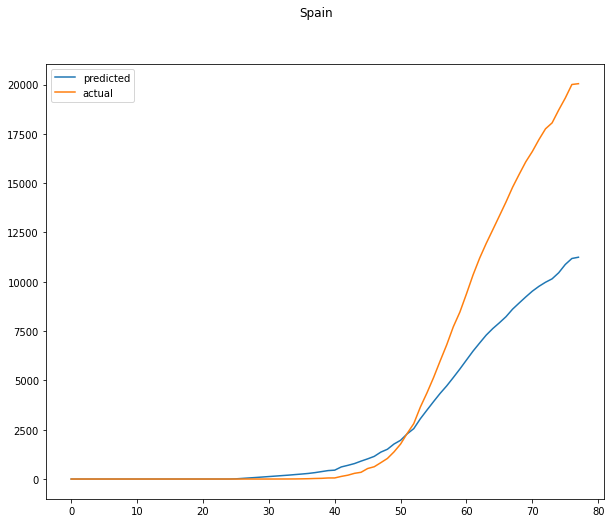

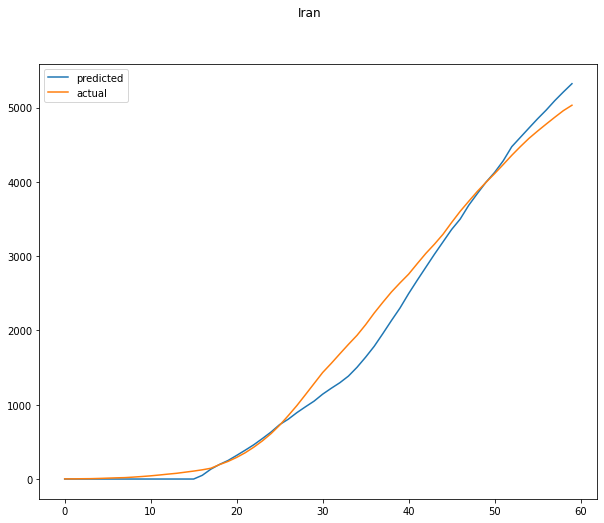

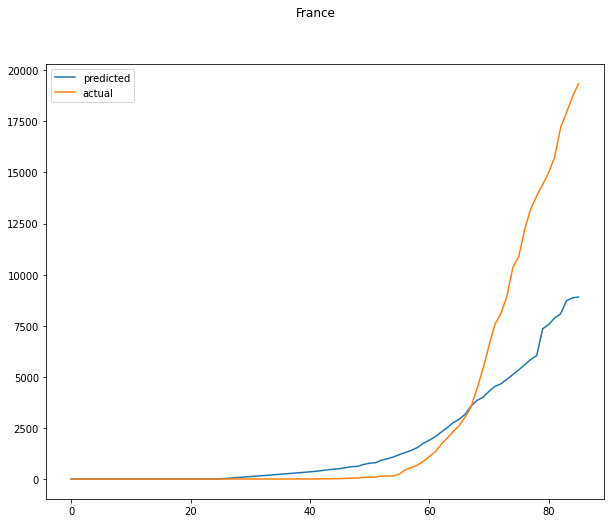

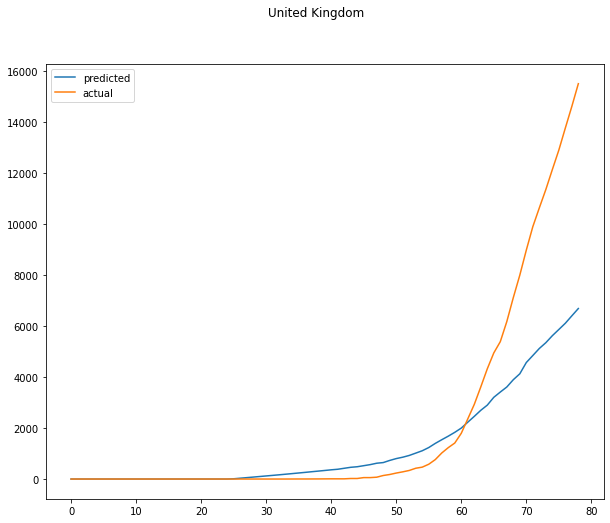

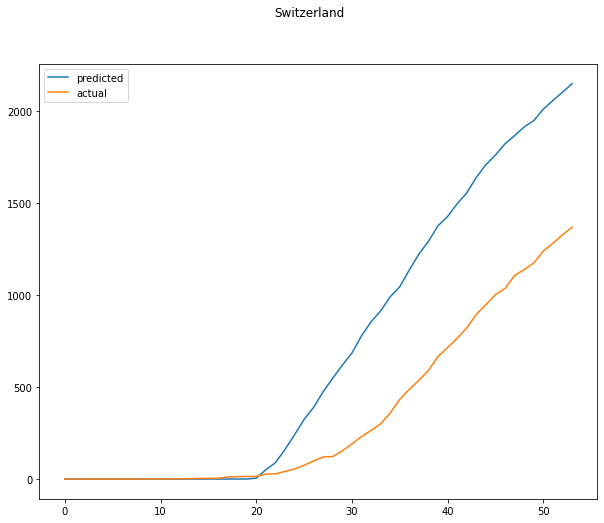

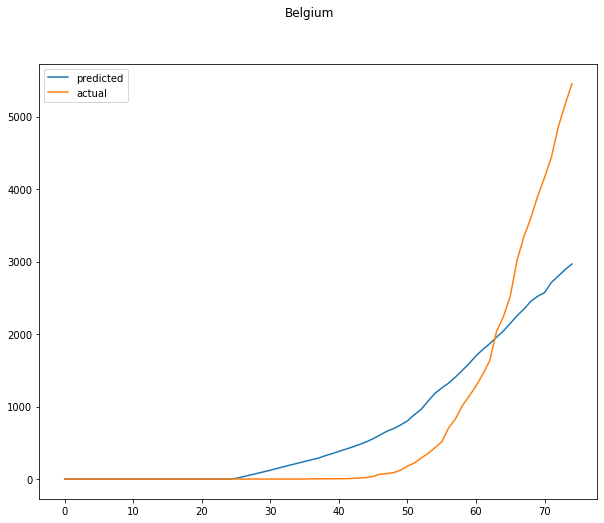

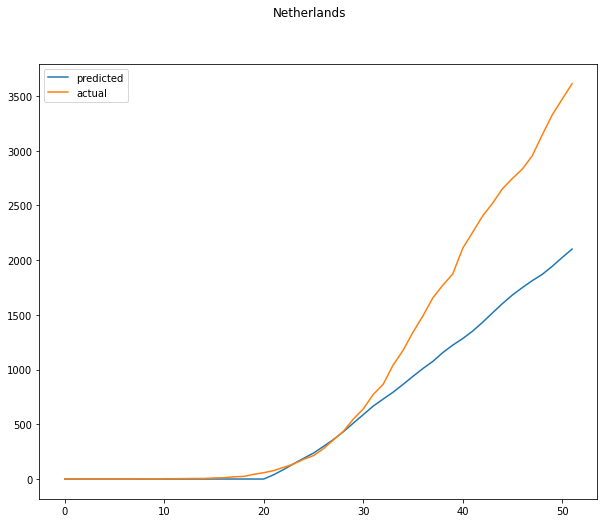

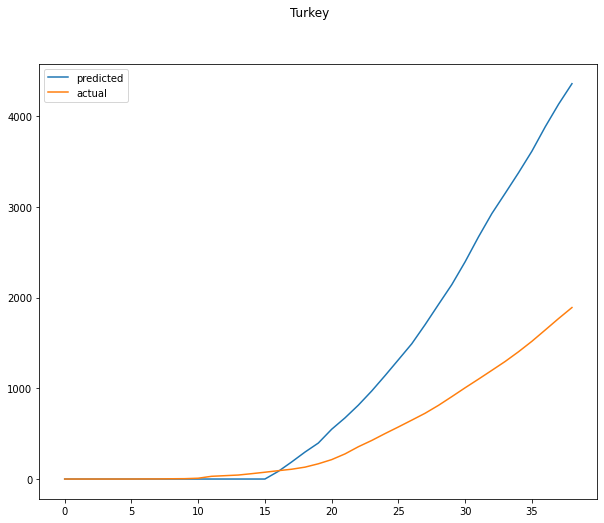

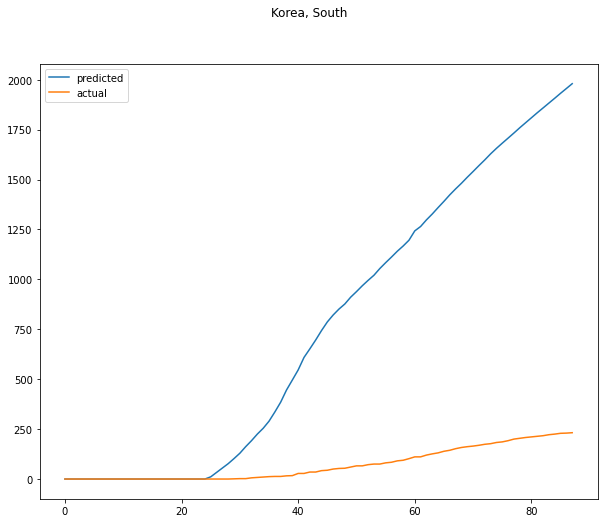

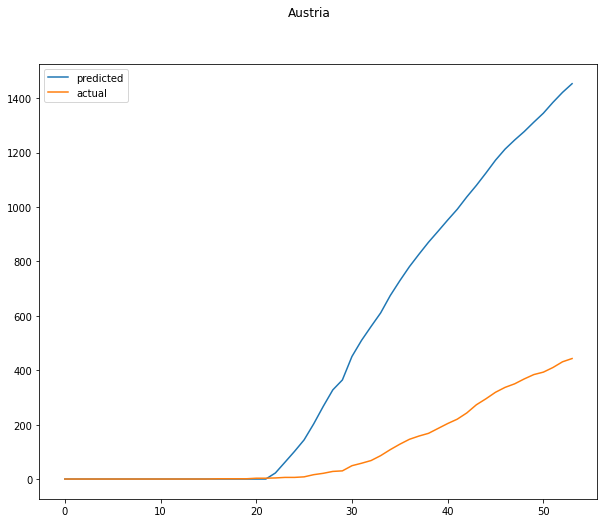

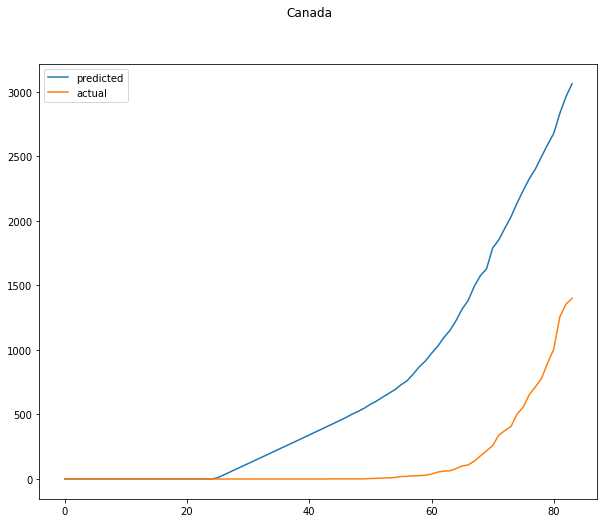

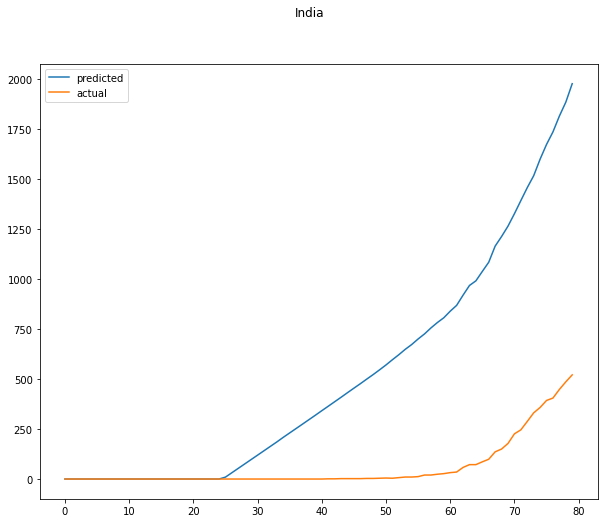

In [249]:
for i in top_15:
    one_country = model_data[model_data['Country']==i]
    #X = one_country[['index', 'Confirmed', 'Recovered', 'pop', 'bed_total']]
    X = one_country[['index', 'Confirmed', 'Recovered']]
    y = one_country['Deaths']
    pred = lr_death.predict(X)
    pred[pred<0]=0
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(i)
    plt.plot(pred, label='predicted')
    plt.plot(y, label='actual')
    plt.legend(loc = 'upper left')

In [250]:
X = model_data[['index', 'Confirmed', 'Deaths', 'pop', 'bed_total']]
y = model_data['Recovered']
X_train, X_test, y_train, y_test_rec = train_test_split(X, y, test_size=0.33, random_state=42)
lr_rec = LinearRegression()
lr_rec.fit(X_train, y_train)
pred_rec = lr_rec.predict(X_test)
pred_rec[pred_rec<0]=0

In [251]:
'''
fig = plt.figure(figsize = (15,12))
plt.plot(y_test_rec.values)
plt.plot(pred_rec)
'''

'\nfig = plt.figure(figsize = (15,12))\nplt.plot(y_test_rec.values)\nplt.plot(pred_rec)\n'

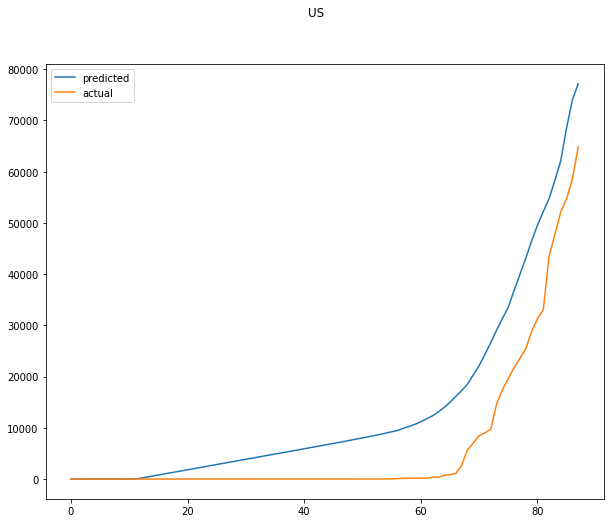

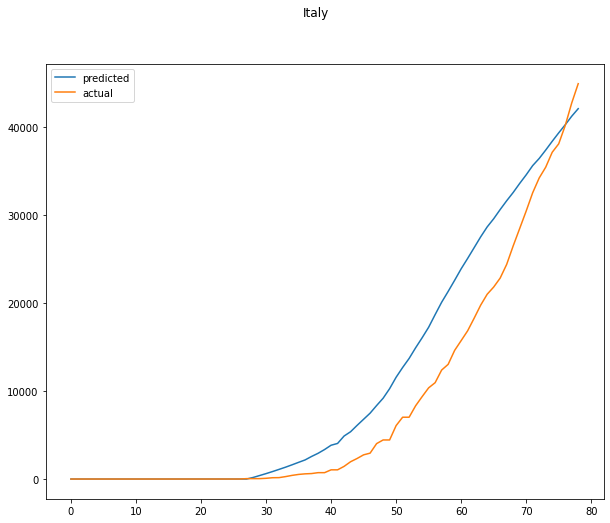

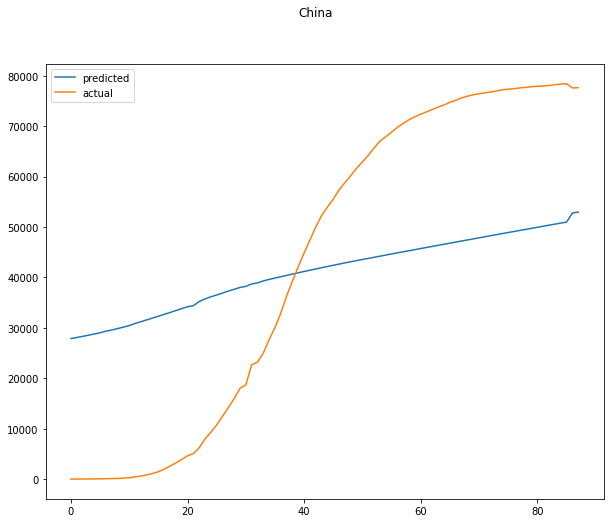

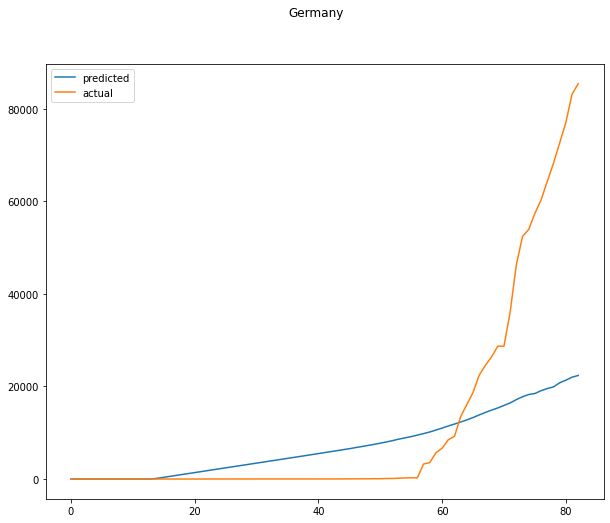

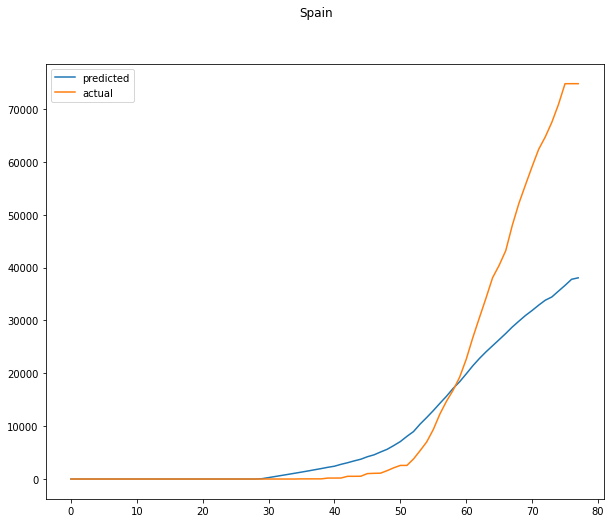

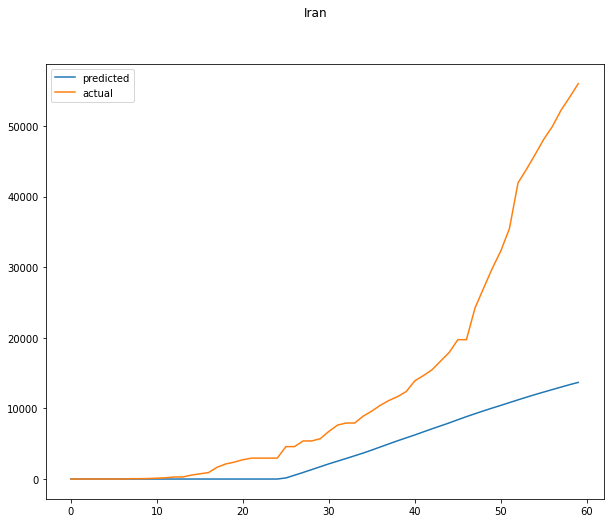

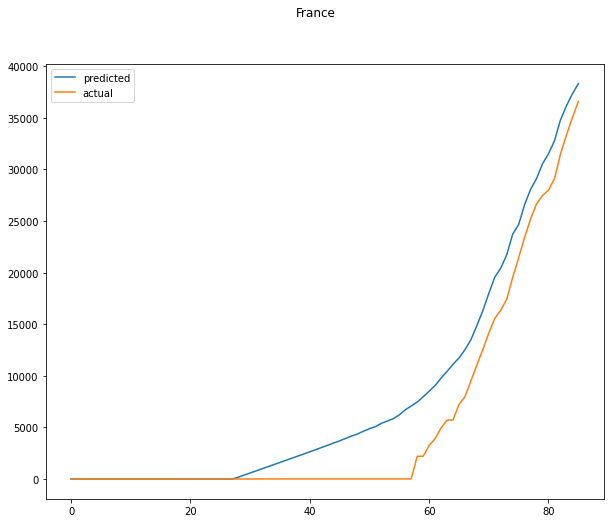

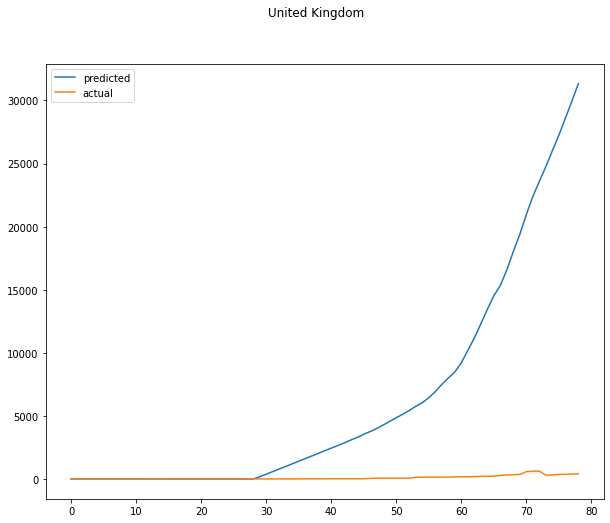

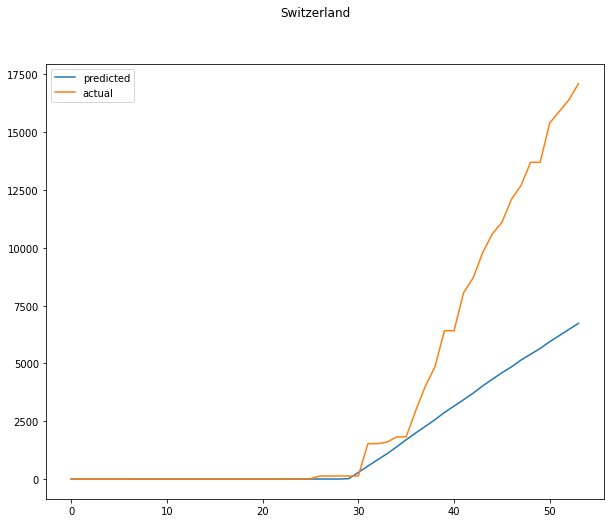

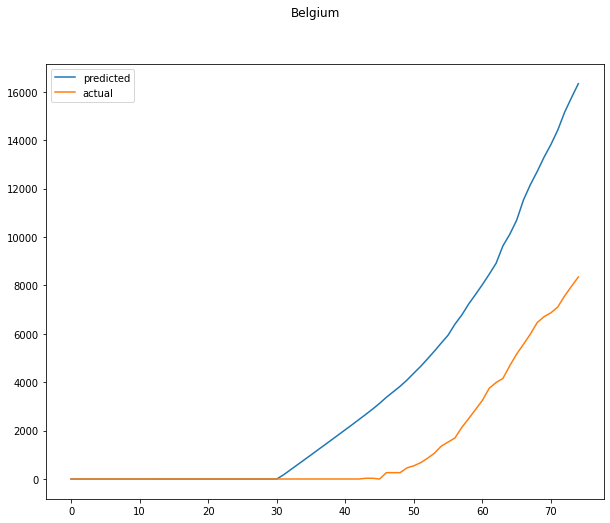

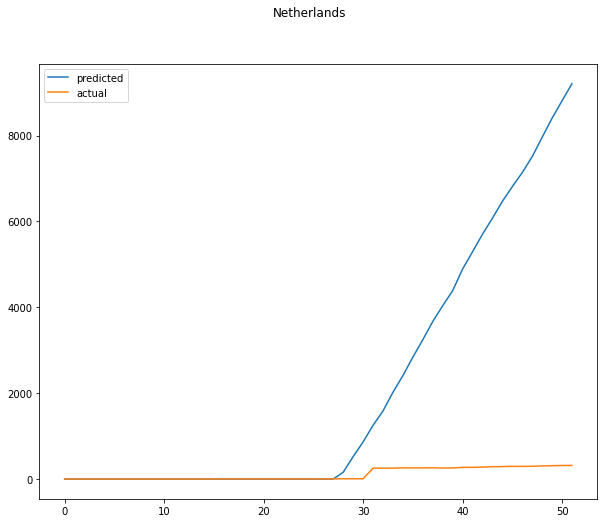

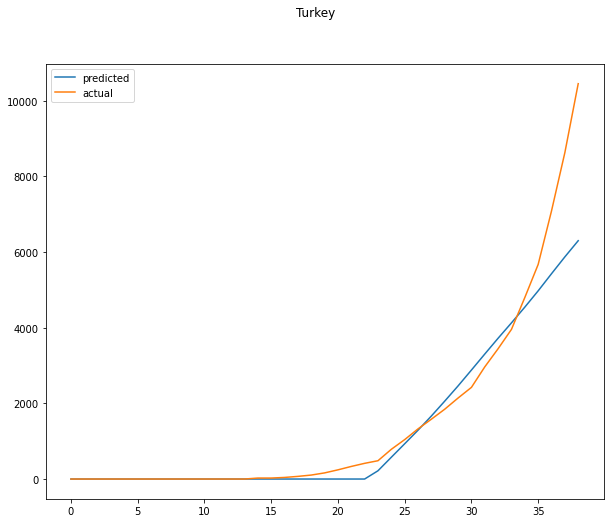

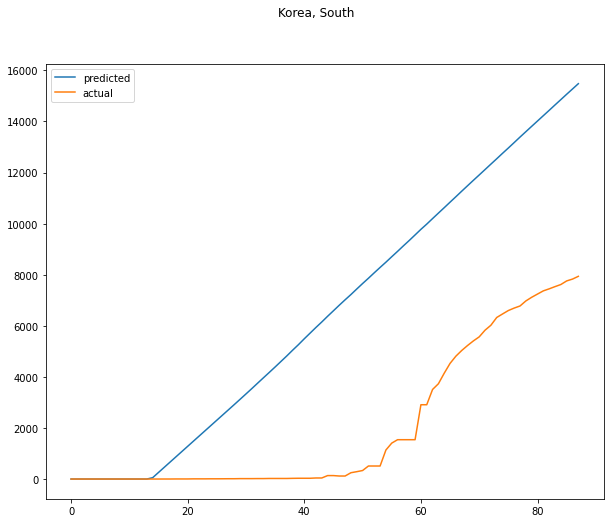

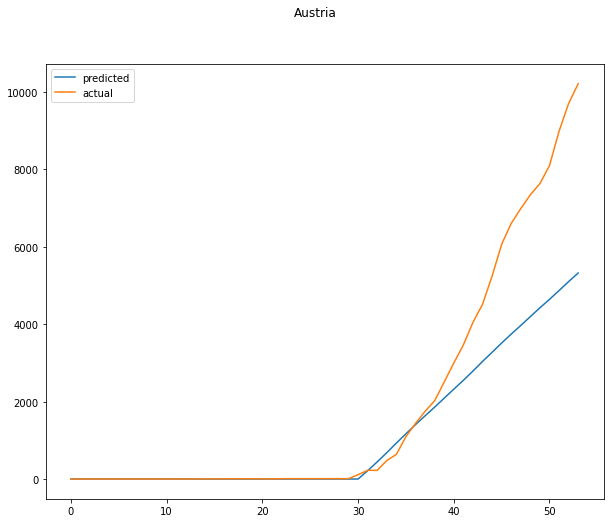

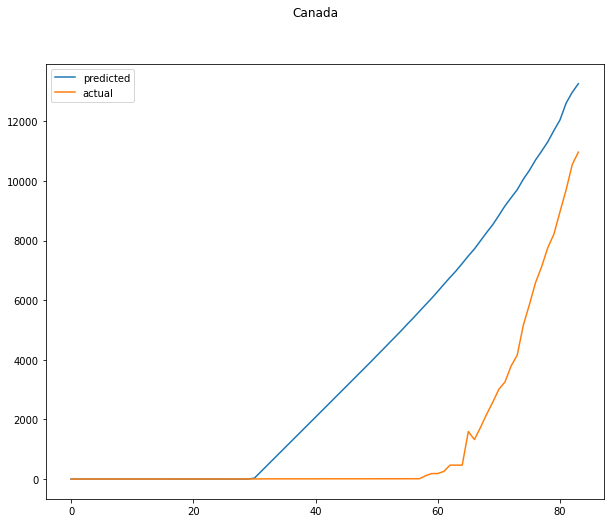

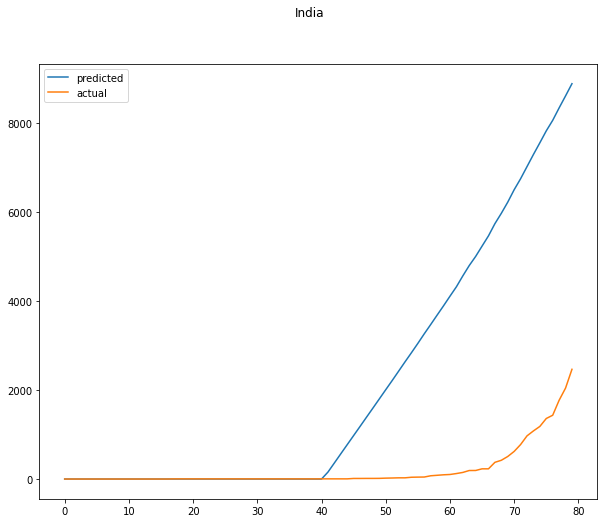

In [252]:
for i in top_15:
    one_country = model_data[model_data['Country']==i]
    X = one_country[['index', 'Confirmed', 'Deaths', 'pop', 'bed_total']]
    #X = one_country[['index', 'Confirmed', 'Recovered']]
    y = one_country['Recovered']
    pred = lr_rec.predict(X)
    pred[pred<0]=0
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(i)
    plt.plot(pred, label='predicted')
    plt.plot(y, label='actual')
    plt.legend(loc = 'upper left')

In [253]:
#X = model_data[['index', 'Confirmed', 'Recovered', 'pop', 'bed_total']]
X = model_data[['index', 'Confirmed', 'Recovered']]
y = model_data['Deaths']
X_train, X_test, y_train, y_test_death = train_test_split(X, y, test_size=0.33, random_state=42)
lr_death = LinearRegression()
lr_death.fit(X_train, y_train)
pred_death = lr_death.predict(X_test)
pred_death[pred_death<0]=0

In [254]:
from sklearn.preprocessing import PolynomialFeatures
X = model_data[['index', 'Confirmed', 'Recovered']]
y = model_data['Deaths']
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_train, X_test, y_train, y_test_death = train_test_split(X_poly, y, test_size=0.33, random_state=42)
lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)
pred_poly = lr_poly.predict(X_test)
pred_poly[pred_poly<0]=0

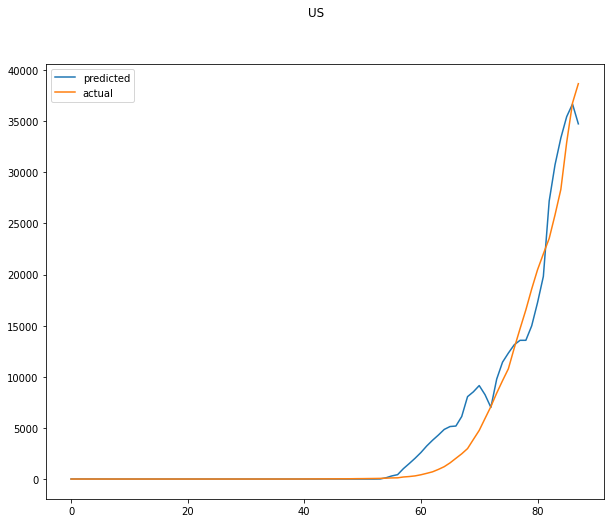

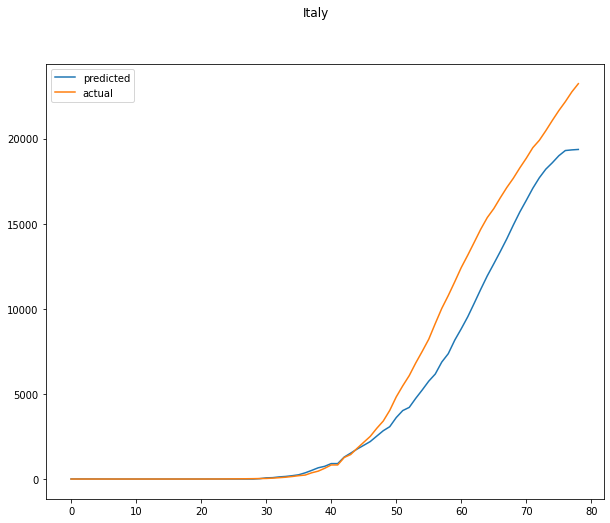

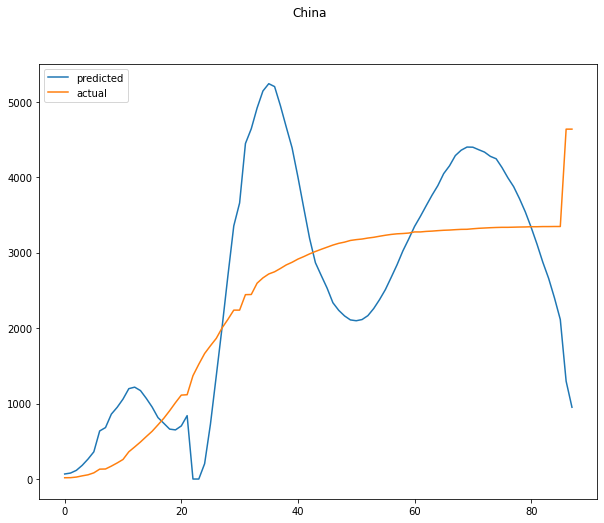

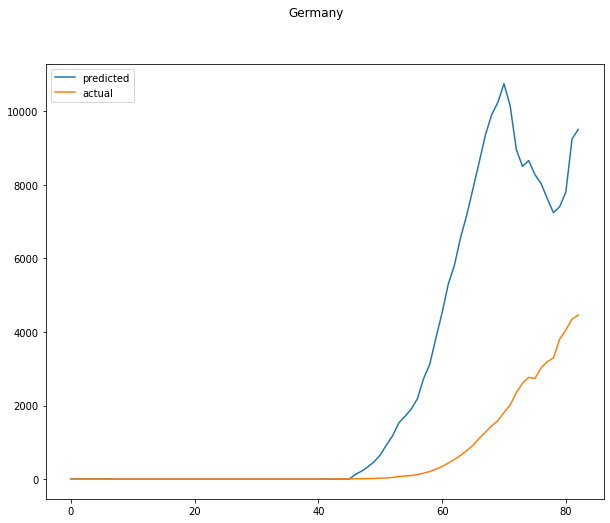

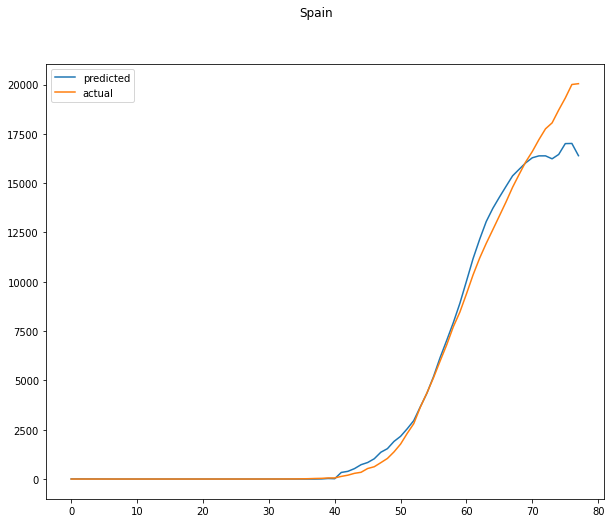

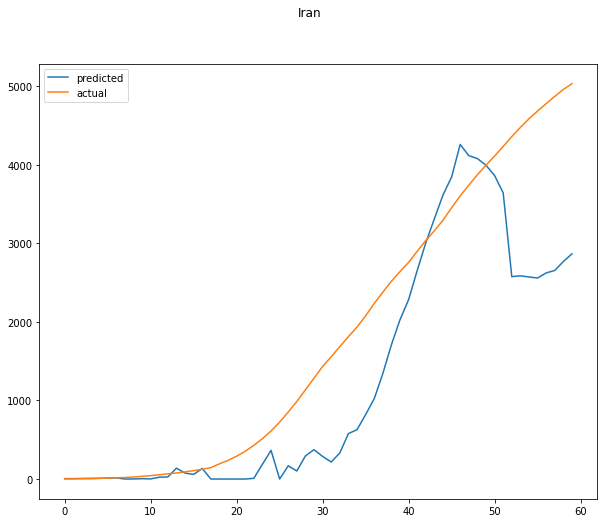

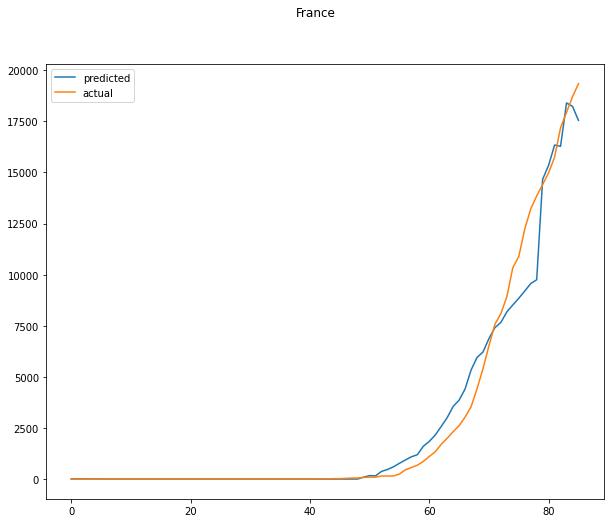

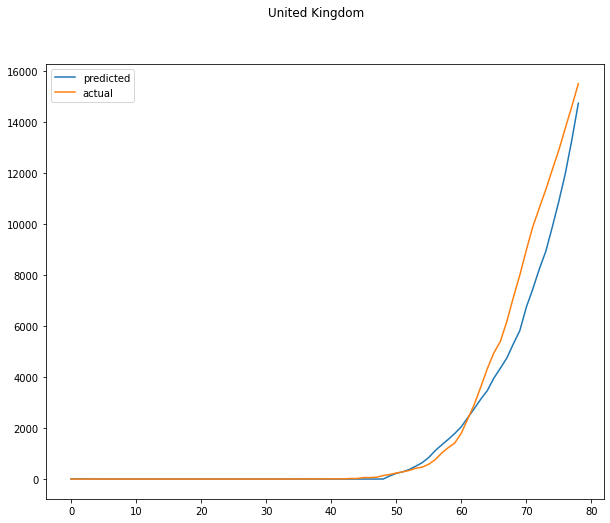

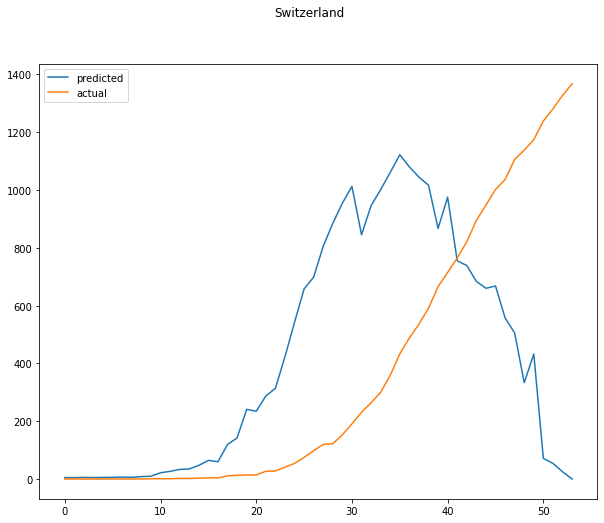

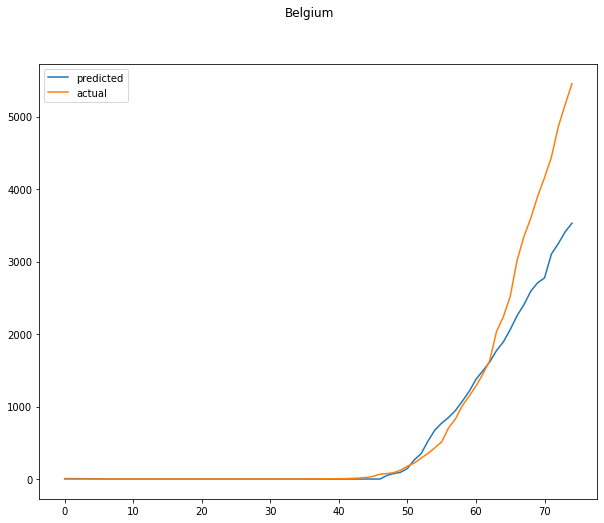

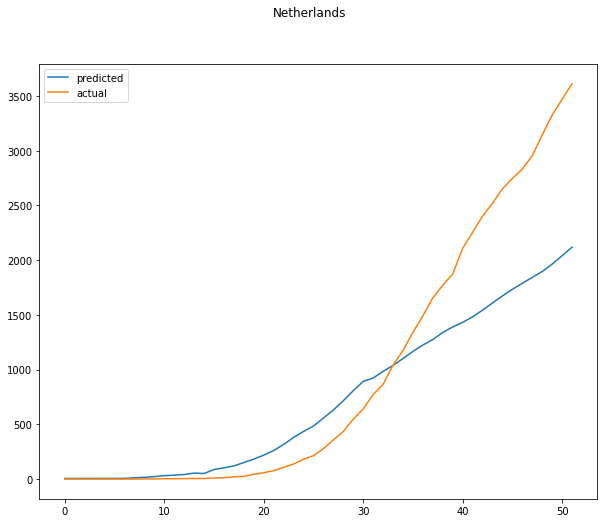

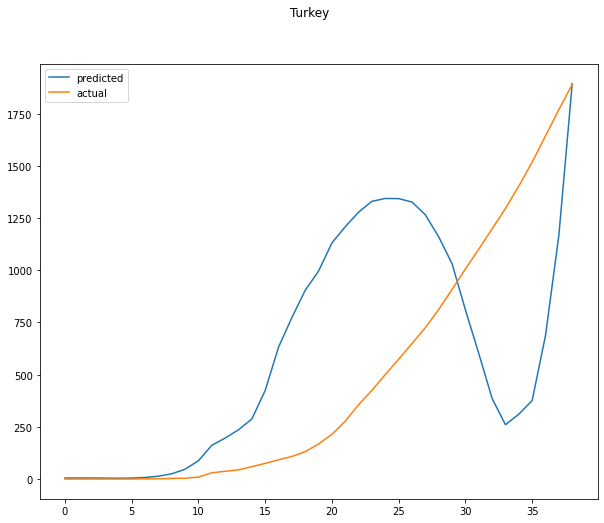

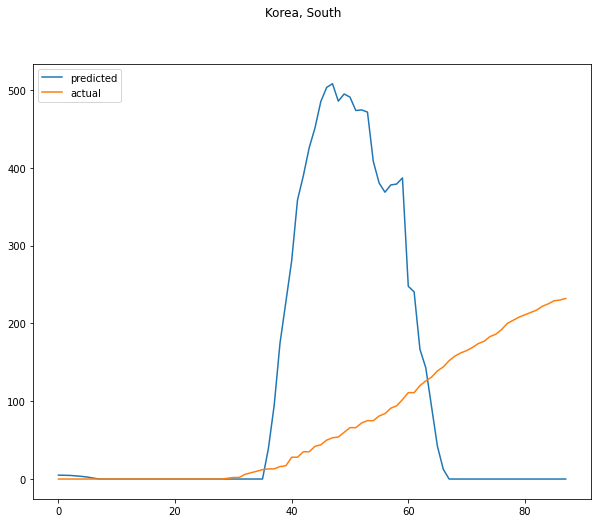

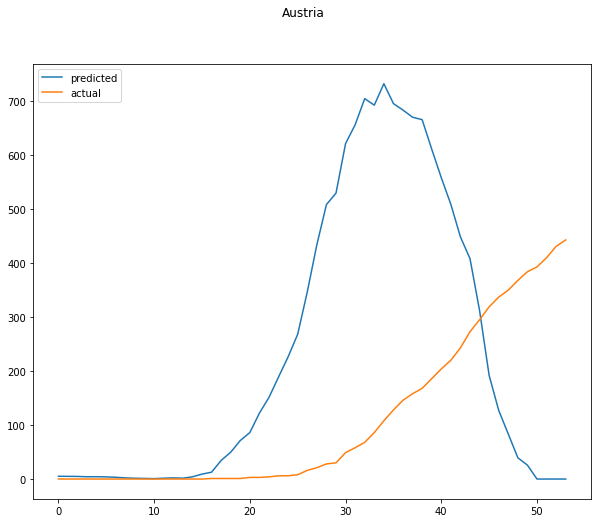

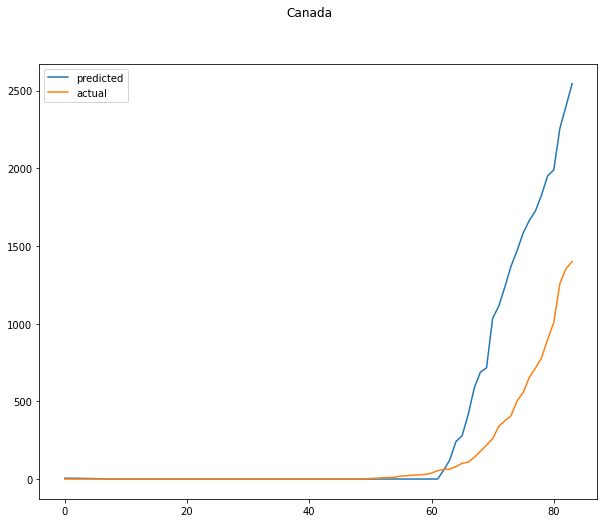

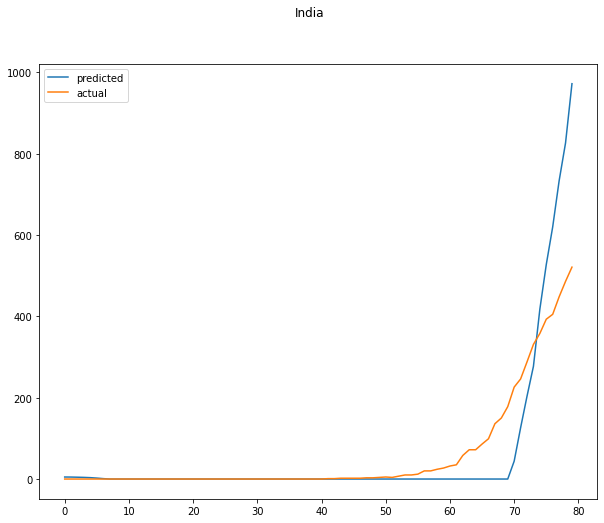

In [255]:
for i in top_15:
    one_country = model_data[model_data['Country']==i]
    #X = one_country[['index', 'Confirmed', 'Recovered', 'pop', 'bed_total']]
    X = one_country[['index', 'Confirmed', 'Recovered']]
    y = one_country['Deaths']
    poly_reg = PolynomialFeatures(degree=3)
    X_poly = poly_reg.fit_transform(X)
    pred = lr_poly.predict(X_poly)
    pred[pred<0]=0
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(i)
    plt.plot(pred, label='predicted')
    plt.plot(y, label='actual')
    plt.legend(loc = 'upper left')